In [1]:
import pandas as pd
import glob
import os
from sklearn.metrics import average_precision_score, precision_recall_curve, auc
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr
from scipy.stats import mannwhitneyu

In [2]:
from variant_tasks import *

unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 0.9999362568338305
HyenaDNA African Significant caQTLs


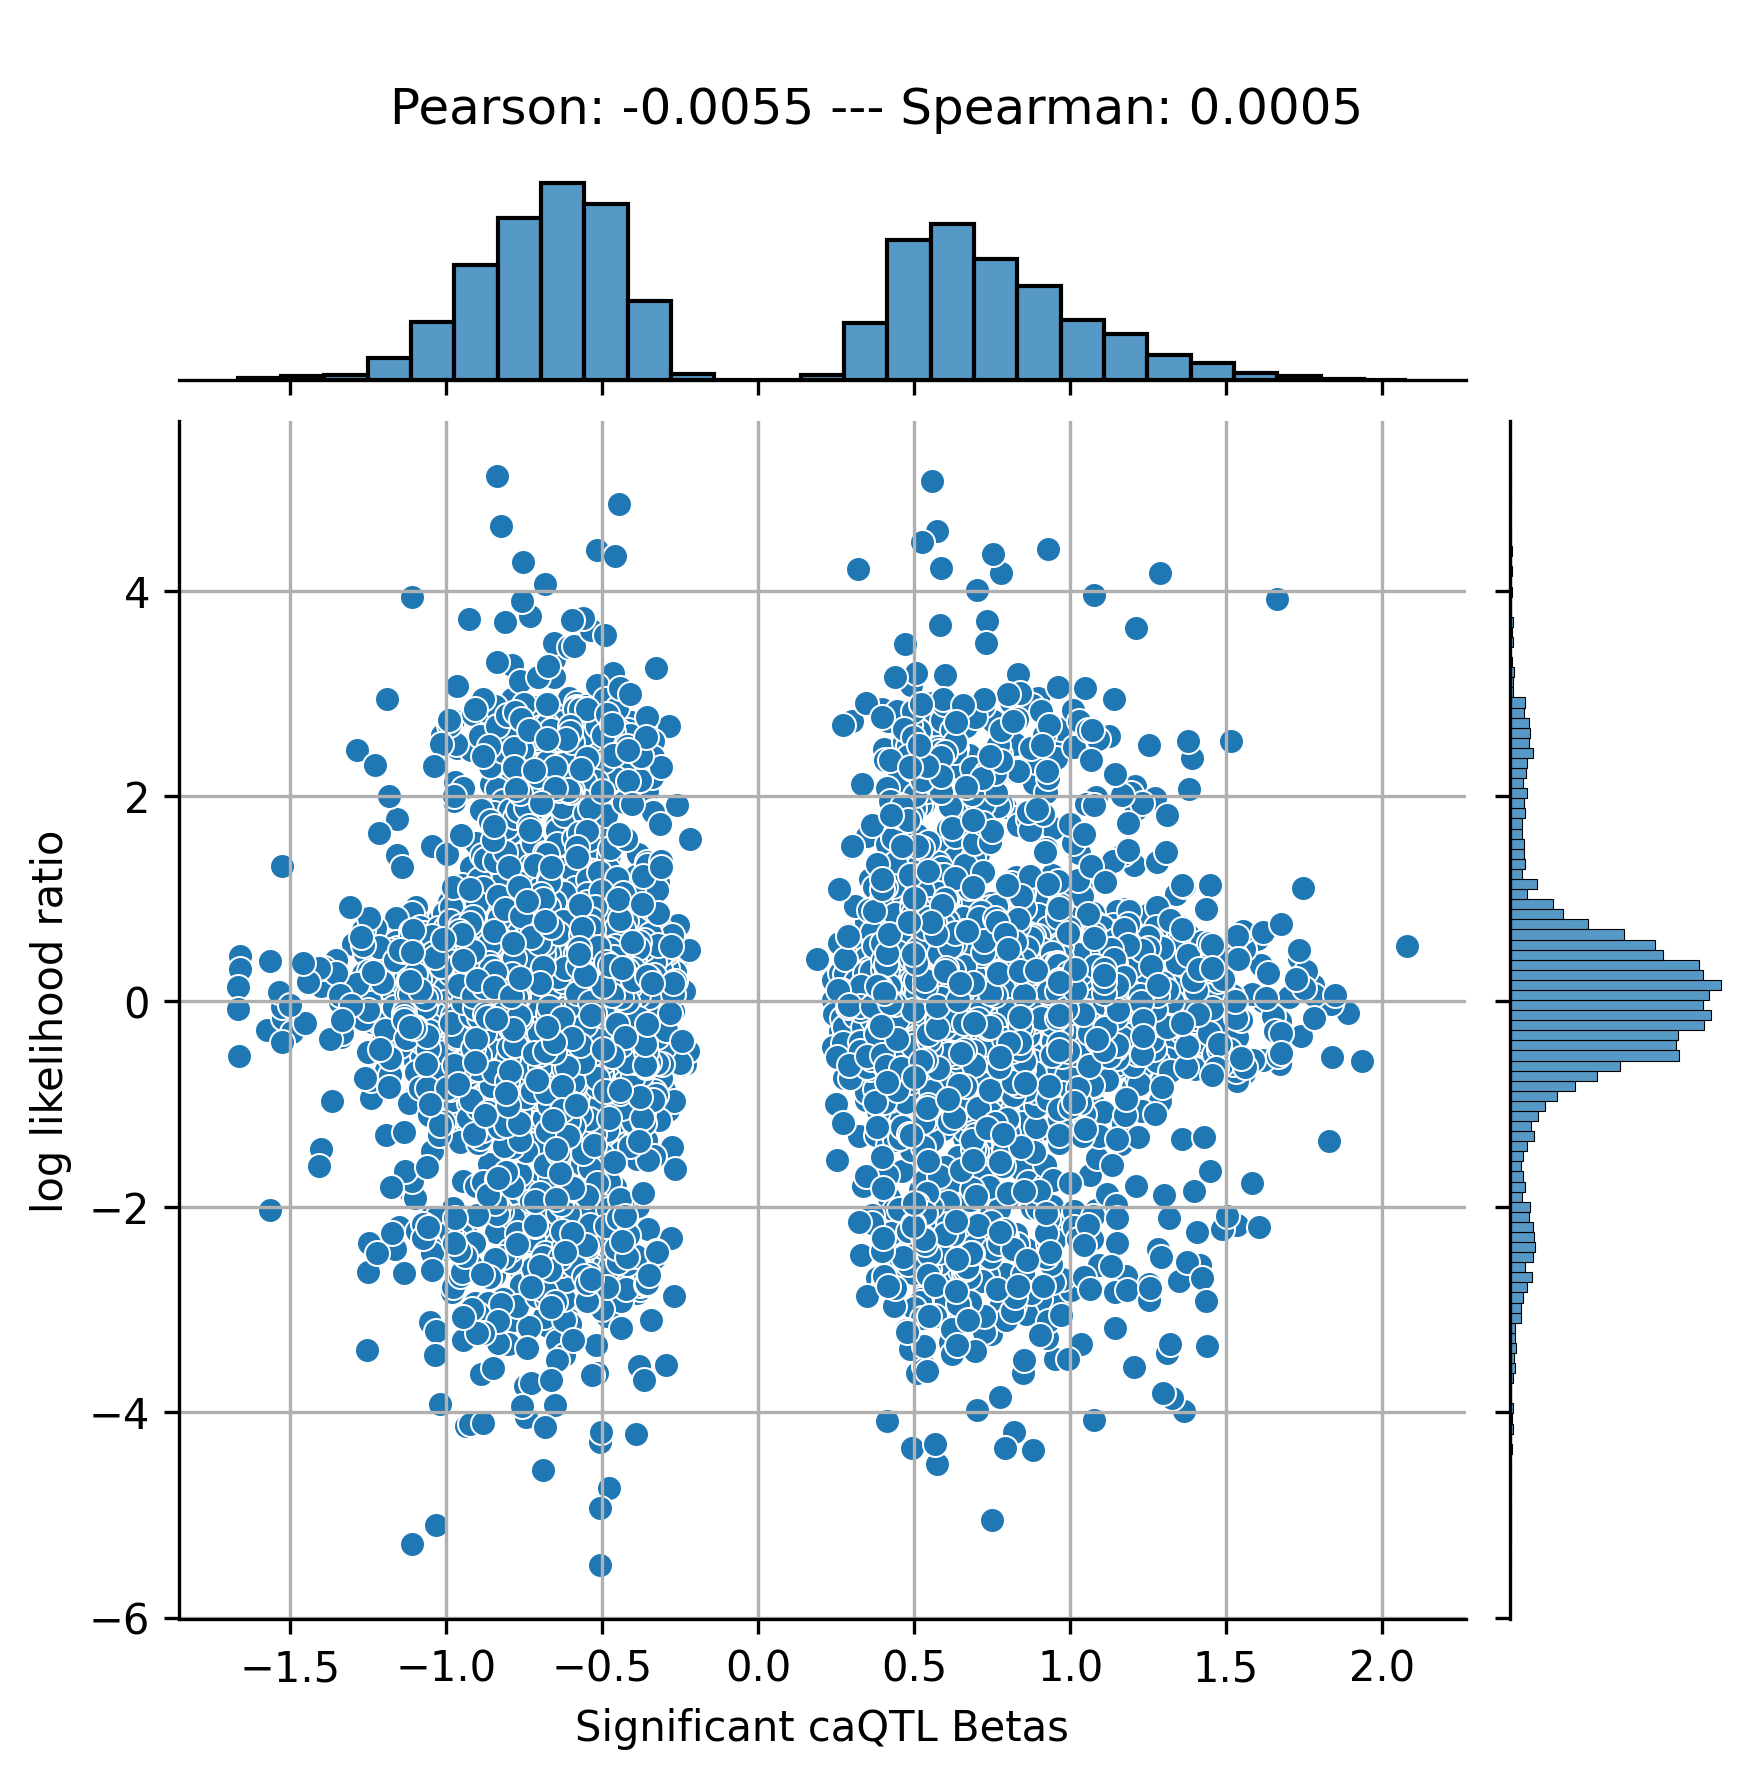

0.08161138365438975 0.4860352028353586 -0.005455264432403138 0.0004984938282831963
unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 2.155796604373482e-12
Nucleotide Transformer African Significant caQTLs


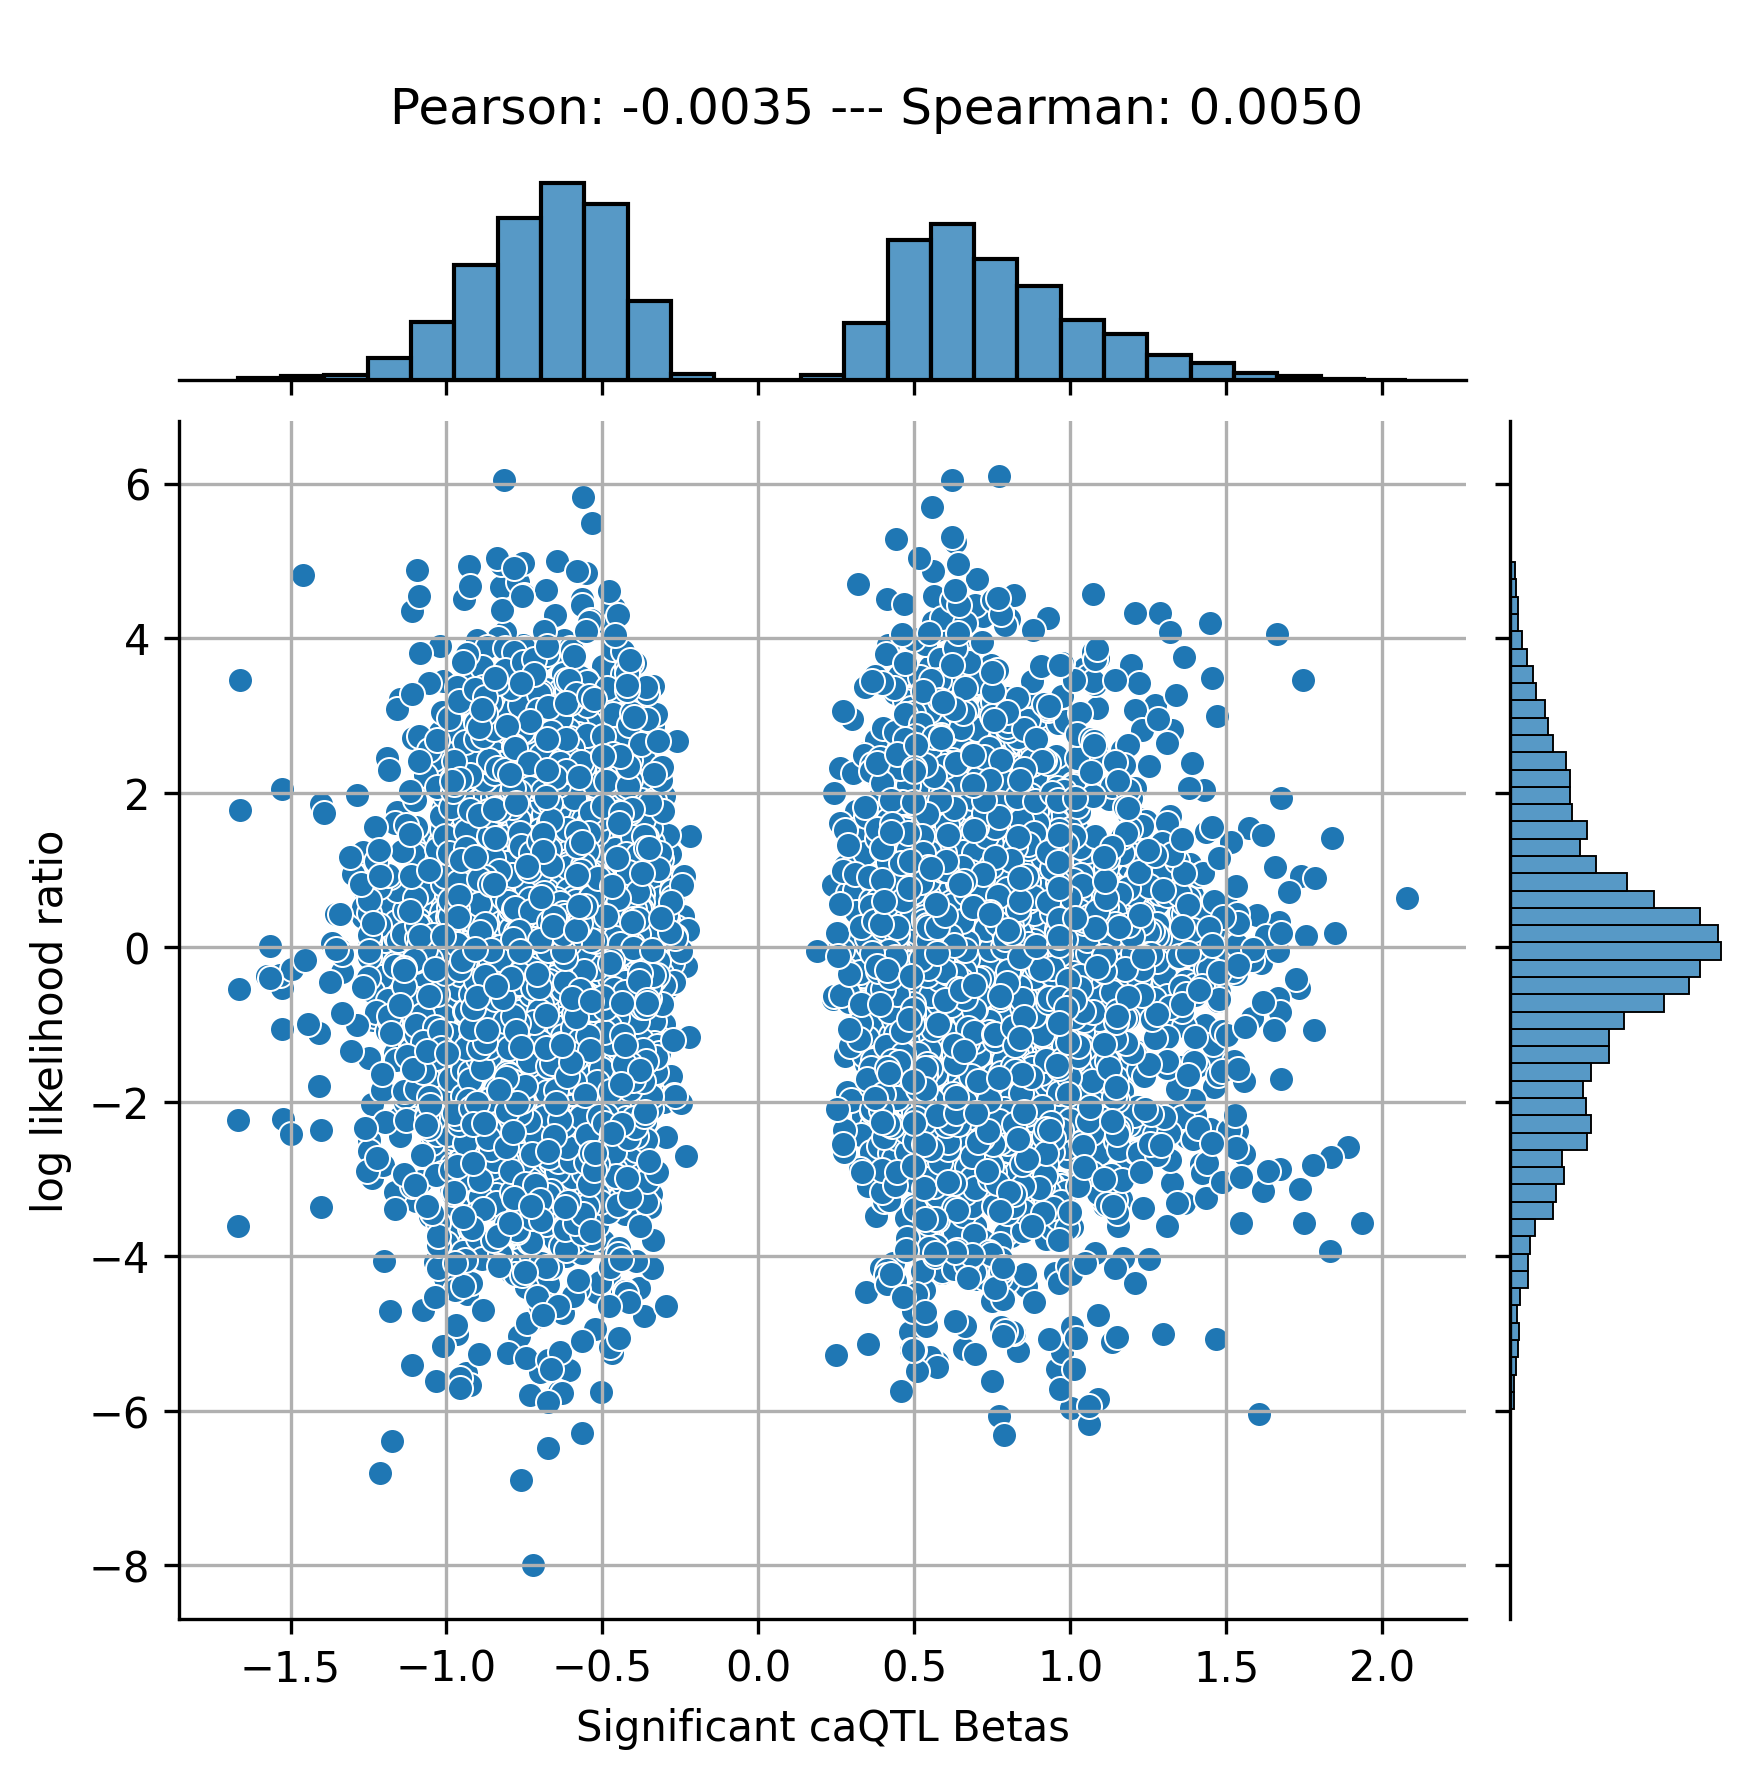

0.09208634595160928 0.5252470663942047 -0.0035060838296118737 0.00501212925508905
unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
HyenaDNA Yoruba Significant dsQTLs


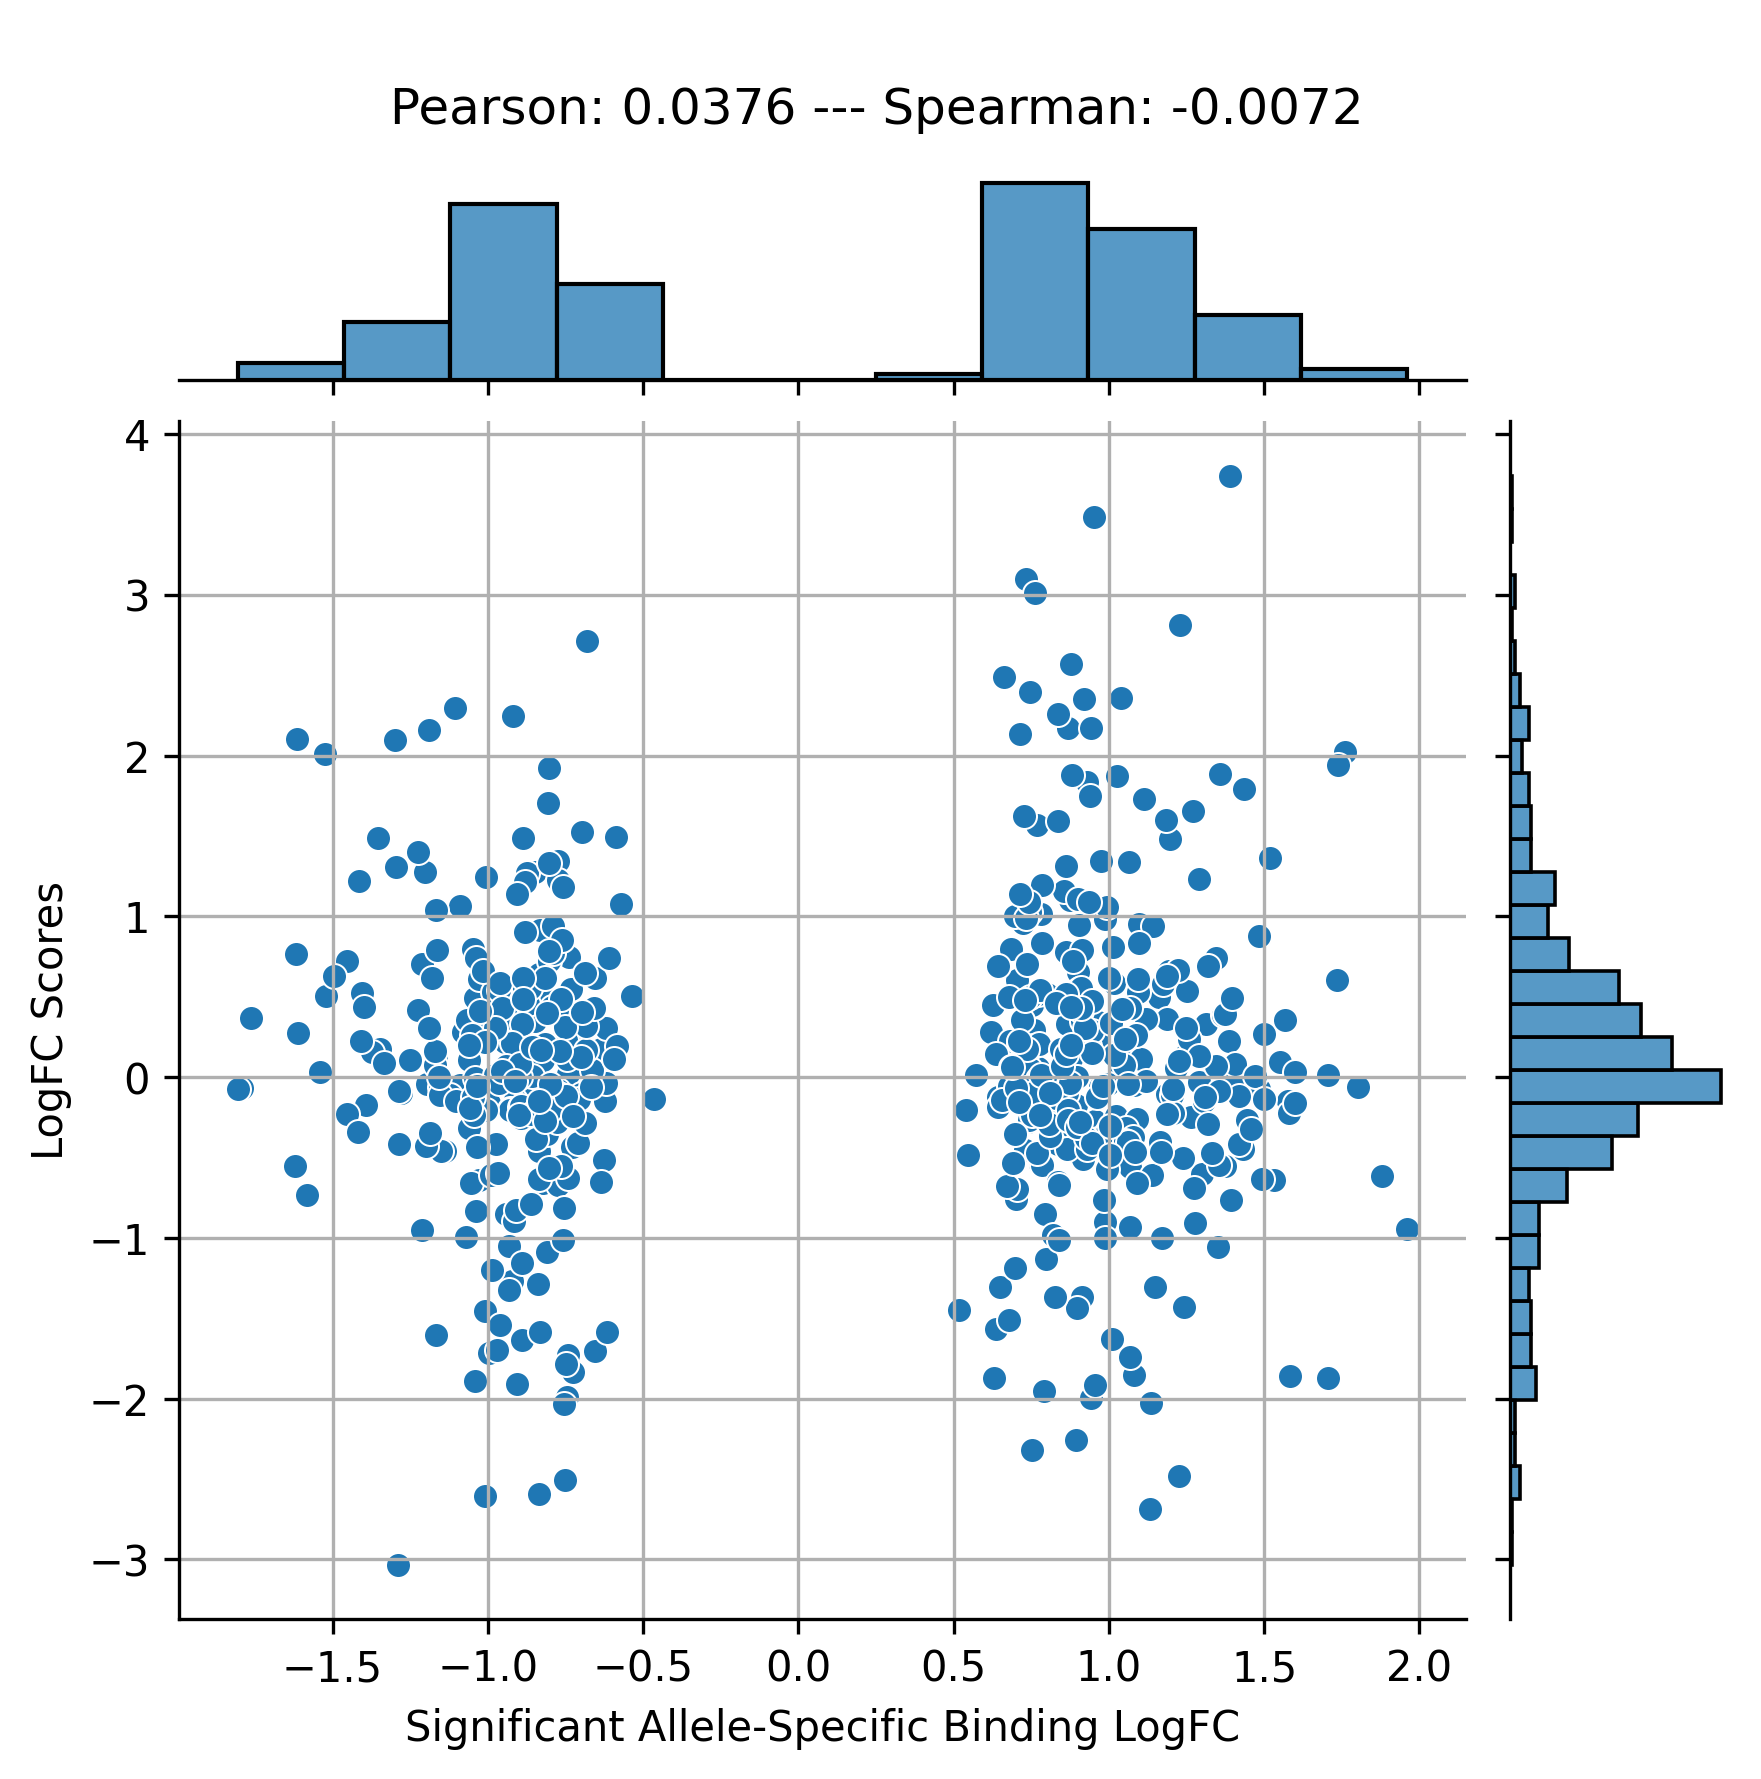

unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
Nucleotide Transformer Yoruba Significant dsQTLs


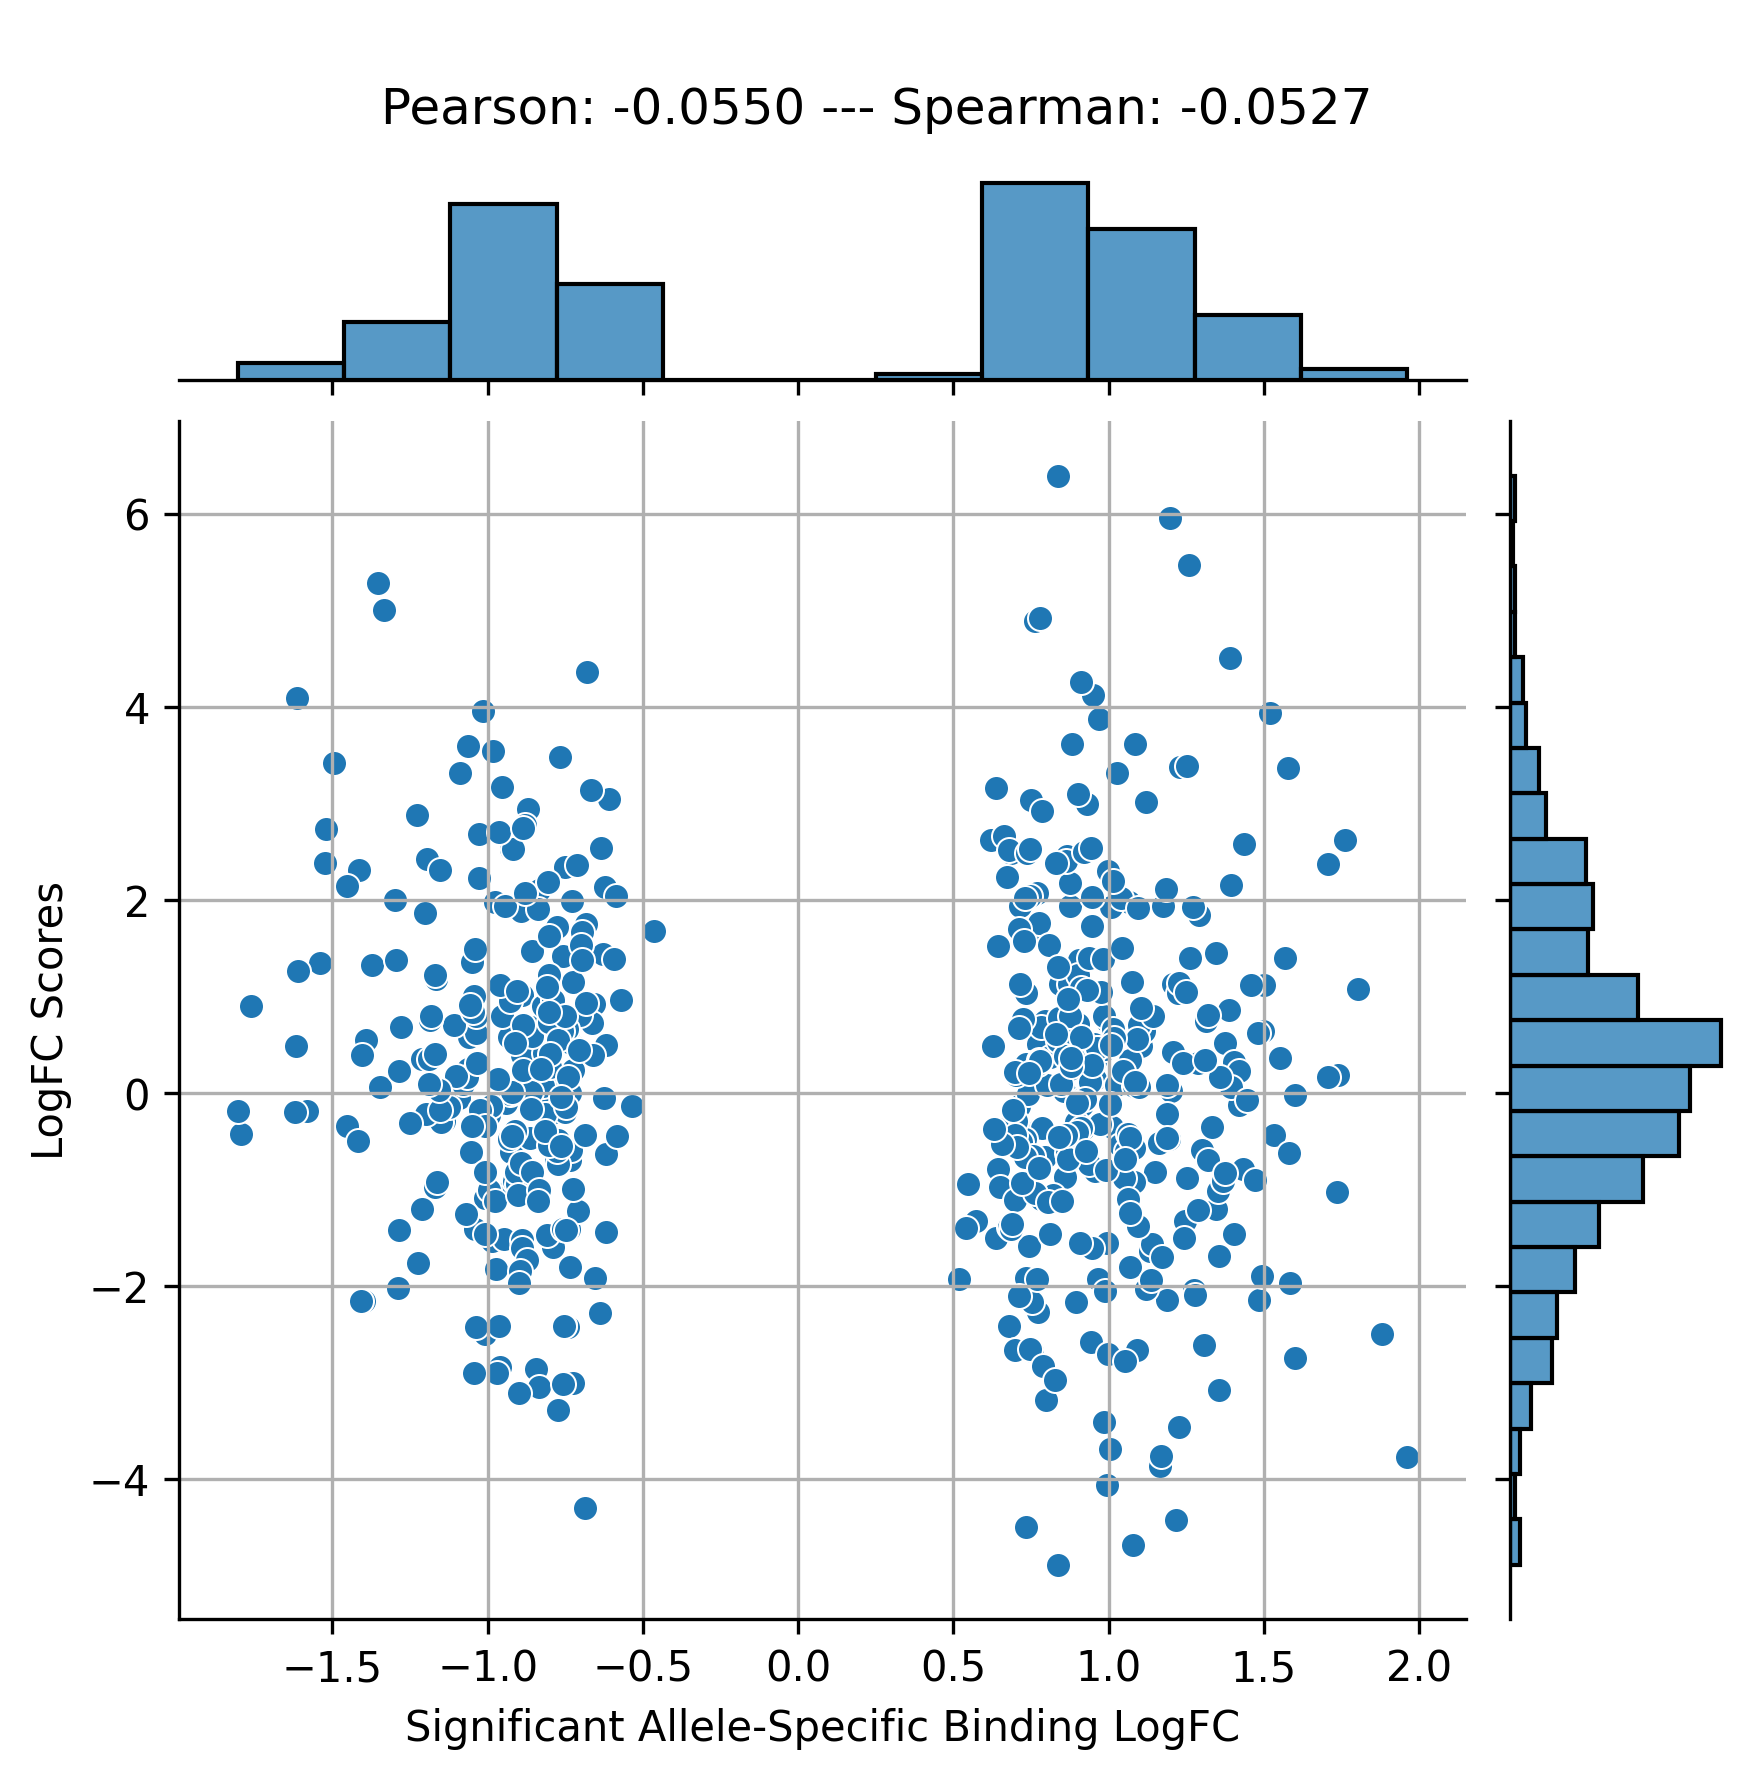

In [3]:
model_names=["hyenadna-large-1m-seqlen-hf", "nucleotide-transformer-v2-500m-multi-species"]
models=["HyenaDNA", "Nucleotide Transformer"]
model_path = "/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/zero_shot/likelihoods"

afr_counts_pvals = []
afr_counts_auprc = []
afr_counts_auroc = []
afr_counts_pearson = []
afr_counts_spearman = []

yoruba_counts_pvals = []
yoruba_counts_auprc = []
yoruba_counts_auroc = []
yoruba_counts_pearson = []
yoruba_counts_spearman = []

for model_name, model in zip(model_names, models):
    filtered_var_afr_caQTLs_df_ctrl, filtered_var_afr_caQTLs_df_sig = sig_ctrl_variants_Afr_CaQTLs(f"{model_path}/{model_name}/Afr.CaQTLS.tsv")
    filtered_var_afr_caQTLs_df_ctrl, ctrl_afr_countss = compute_change(filtered_var_afr_caQTLs_df_ctrl)
    filtered_var_afr_caQTLs_df_sig, sig_afr_countss = compute_change(filtered_var_afr_caQTLs_df_sig)
    afr_stat, afr_pval = mannwhitneyu(ctrl_afr_countss, sig_afr_countss, alternative="less")
    afr_counts_pvals += [afr_pval]
    print("African caQTL Mann Whitney pVal:", afr_pval)
    print(f"{model} African Significant caQTLs")
    pearson, spearman = beta_logfc(filtered_var_afr_caQTLs_df_sig, "", "log likelihood ratio")
    auprc, auroc = get_precision_recall_auc(ctrl_afr_countss, sig_afr_countss)
    afr_counts_auprc += [auprc]
    afr_counts_auroc += [auroc]
    afr_counts_pearson += [pearson]
    afr_counts_spearman += [spearman]
    print(auprc, auroc, pearson, spearman)
    
for model_name, model in zip(model_names, models):    
    filtered_var_yoruba_caQTLs_df_ctrl, filtered_var_yoruba_caQTLs_df_sig = variants_Yoruba_LCL_dsQTLs(f"{model_path}/{model_name}/gm12878.dsqtls.benchmarking.tsv")
    filtered_var_yoruba_caQTLs_df_ctrl, ctrl_yoruba_countss = compute_change(filtered_var_yoruba_caQTLs_df_ctrl)
    filtered_var_yoruba_caQTLs_df_sig, sig_yoruba_countss = compute_change(filtered_var_yoruba_caQTLs_df_sig)
    yoruba_stat, yoruba_pval = mannwhitneyu(ctrl_yoruba_countss, sig_yoruba_countss, alternative="less")
    yoruba_counts_pvals += [yoruba_pval]
    print(f"{model} Yoruba Significant dsQTLs")
    pearson, spearman = est_size_logfc(filtered_var_yoruba_caQTLs_df_sig, "", "log likelihood ratio")
    auprc, auroc = get_precision_recall_auc(ctrl_yoruba_countss, sig_yoruba_countss)
    yoruba_counts_auprc += [auprc]
    yoruba_counts_auroc += [auroc]
    yoruba_counts_pearson += [pearson]
    yoruba_counts_spearman += [spearman]

In [4]:
from tabulate import tabulate
mydata = [
    afr_counts_pvals,
    afr_counts_auprc,
    afr_counts_auroc,
    afr_counts_pearson,
    afr_counts_spearman,
    yoruba_counts_pvals,
    yoruba_counts_auprc,
    yoruba_counts_auroc,
    yoruba_counts_pearson,
    yoruba_counts_spearman
]

index = ["African P value", "African AUPRC", "African AUROC", "African Pearson", "African Spearman",
          "Yoruba P value", "Yoruba AUPRC", "Yoruba AUROC", "Yoruba Pearson", "Yoruba Spearman"]

mydata = [[i] + row for i, row in zip(index, mydata)]

print(tabulate(mydata, headers=models, tablefmt="grid"))

+------------------+--------------+--------------------------+
|                  |     HyenaDNA |   Nucleotide Transformer |
+==================+==============+==========================+
| African P value  |  0.999936    |               2.1558e-12 |
+------------------+--------------+--------------------------+
| African AUPRC    |  0.0816114   |               0.0920863  |
+------------------+--------------+--------------------------+
| African AUROC    |  0.486035    |               0.525247   |
+------------------+--------------+--------------------------+
| African Pearson  | -0.00545526  |              -0.00350608 |
+------------------+--------------+--------------------------+
| African Spearman |  0.000498494 |               0.00501213 |
+------------------+--------------+--------------------------+
| Yoruba P value   |  1           |               0.993919   |
+------------------+--------------+--------------------------+
| Yoruba AUPRC     |  0.0167962   |               0.018

unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 0.999999983341147
DNABert2 African Significant caQTLs


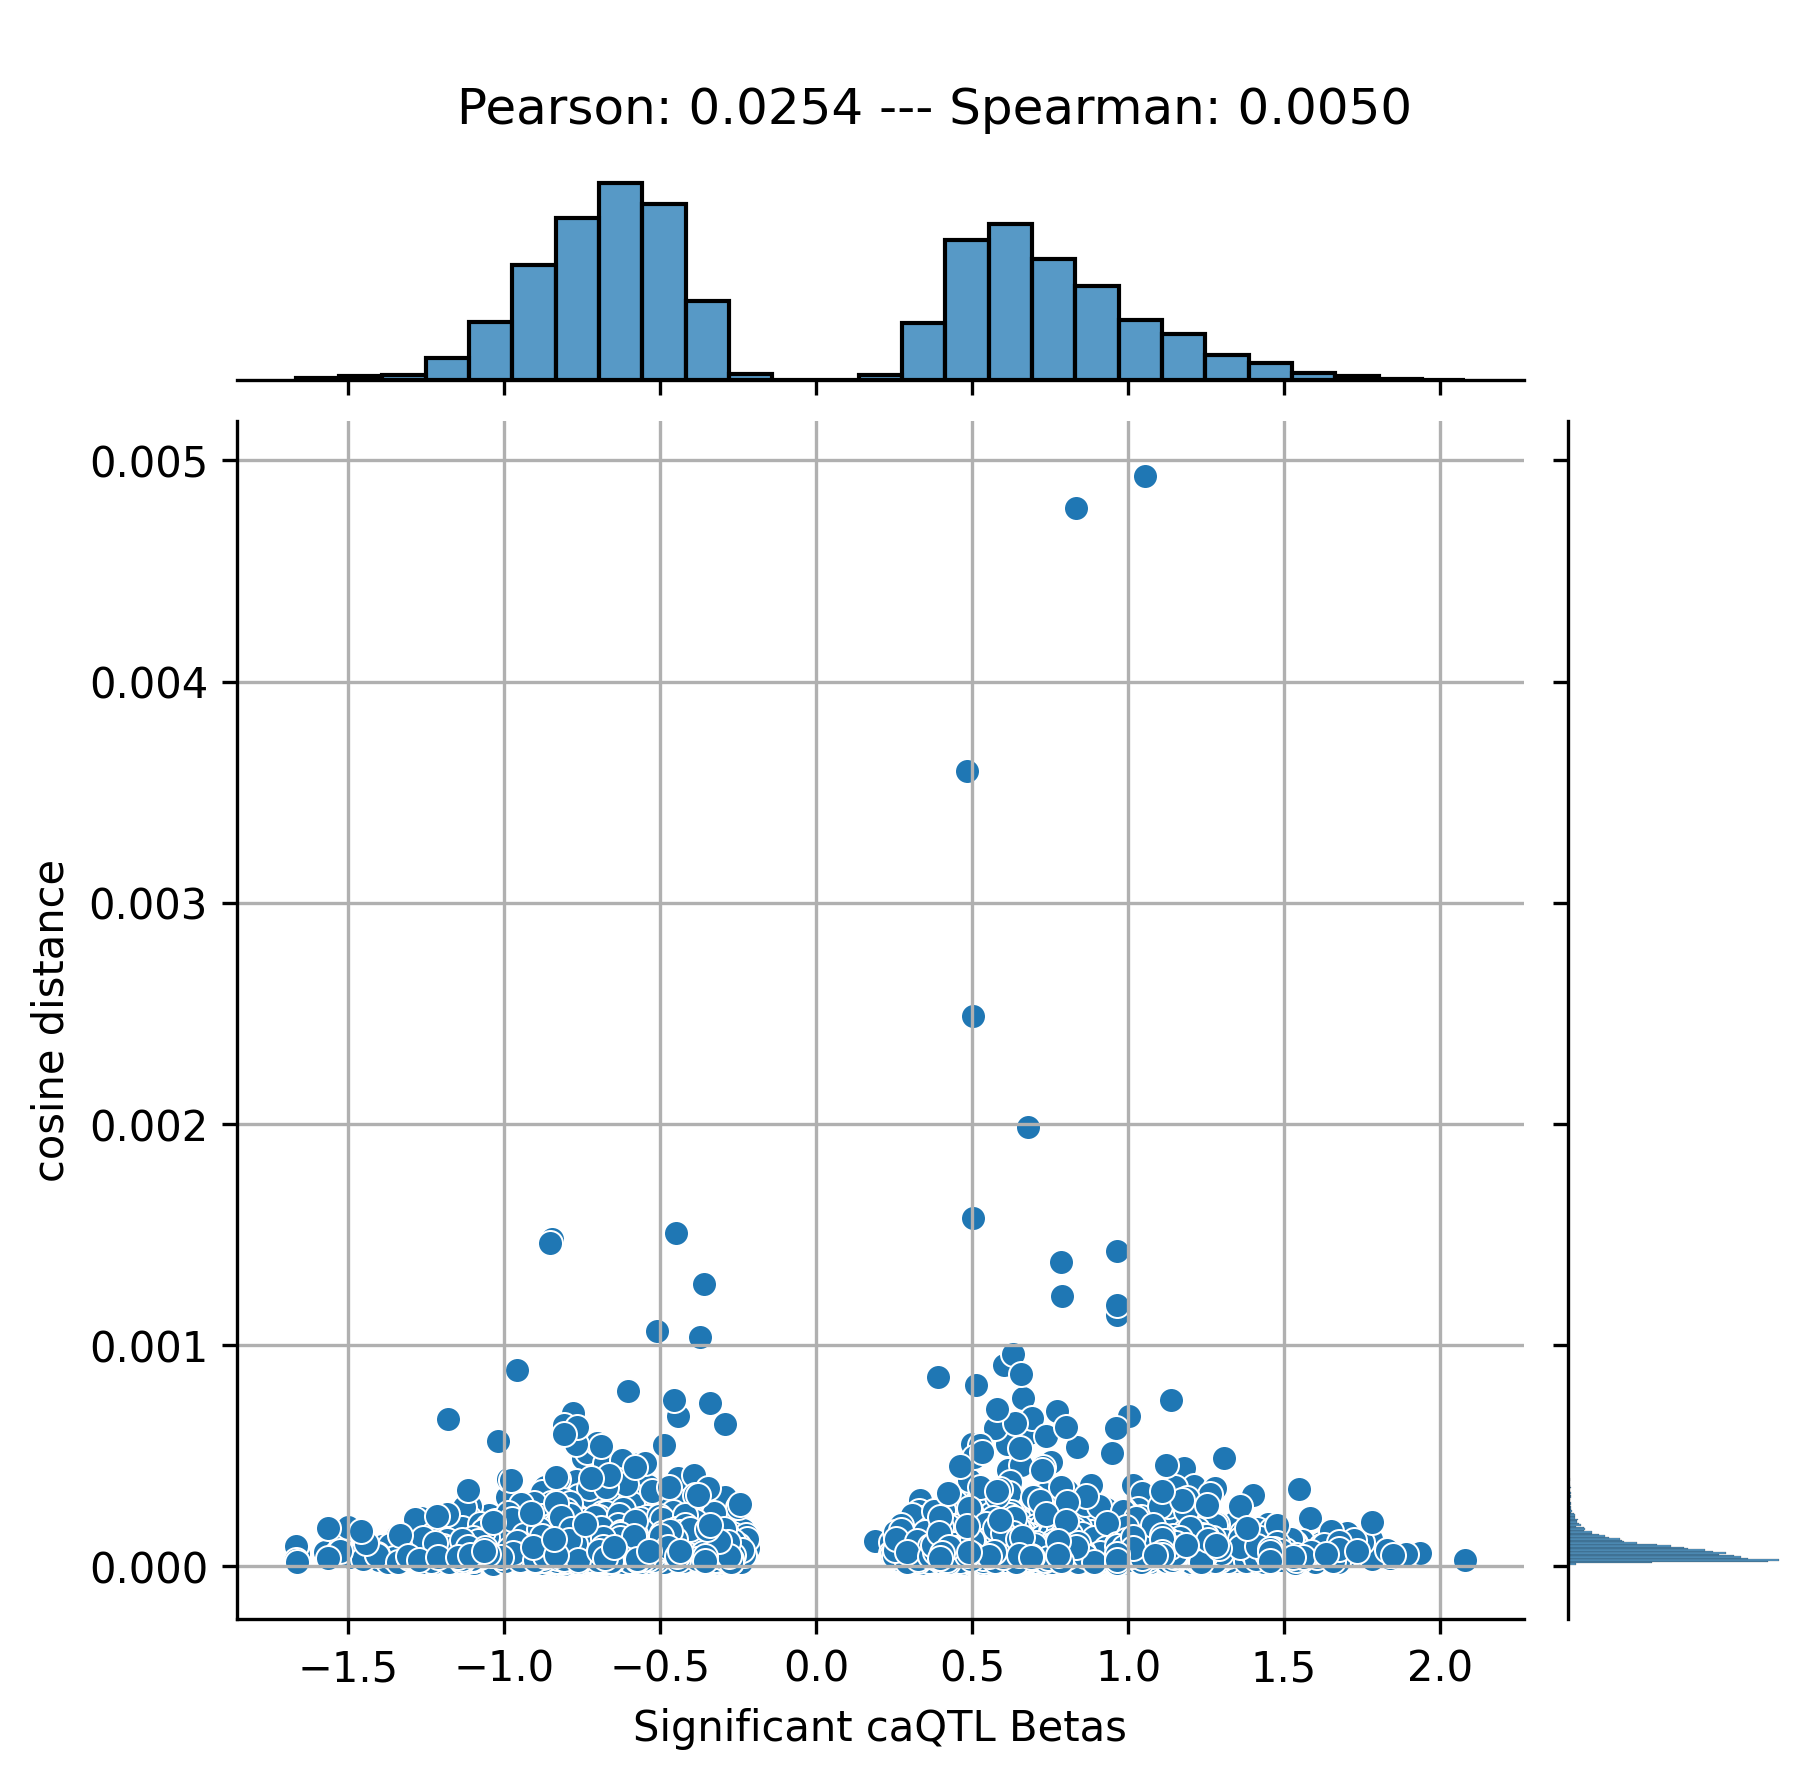

0.07689874855417242 0.4798687390462129 0.025439060890173497 0.005010780191759995
unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 0.01278163217190406
Gena LM African Significant caQTLs


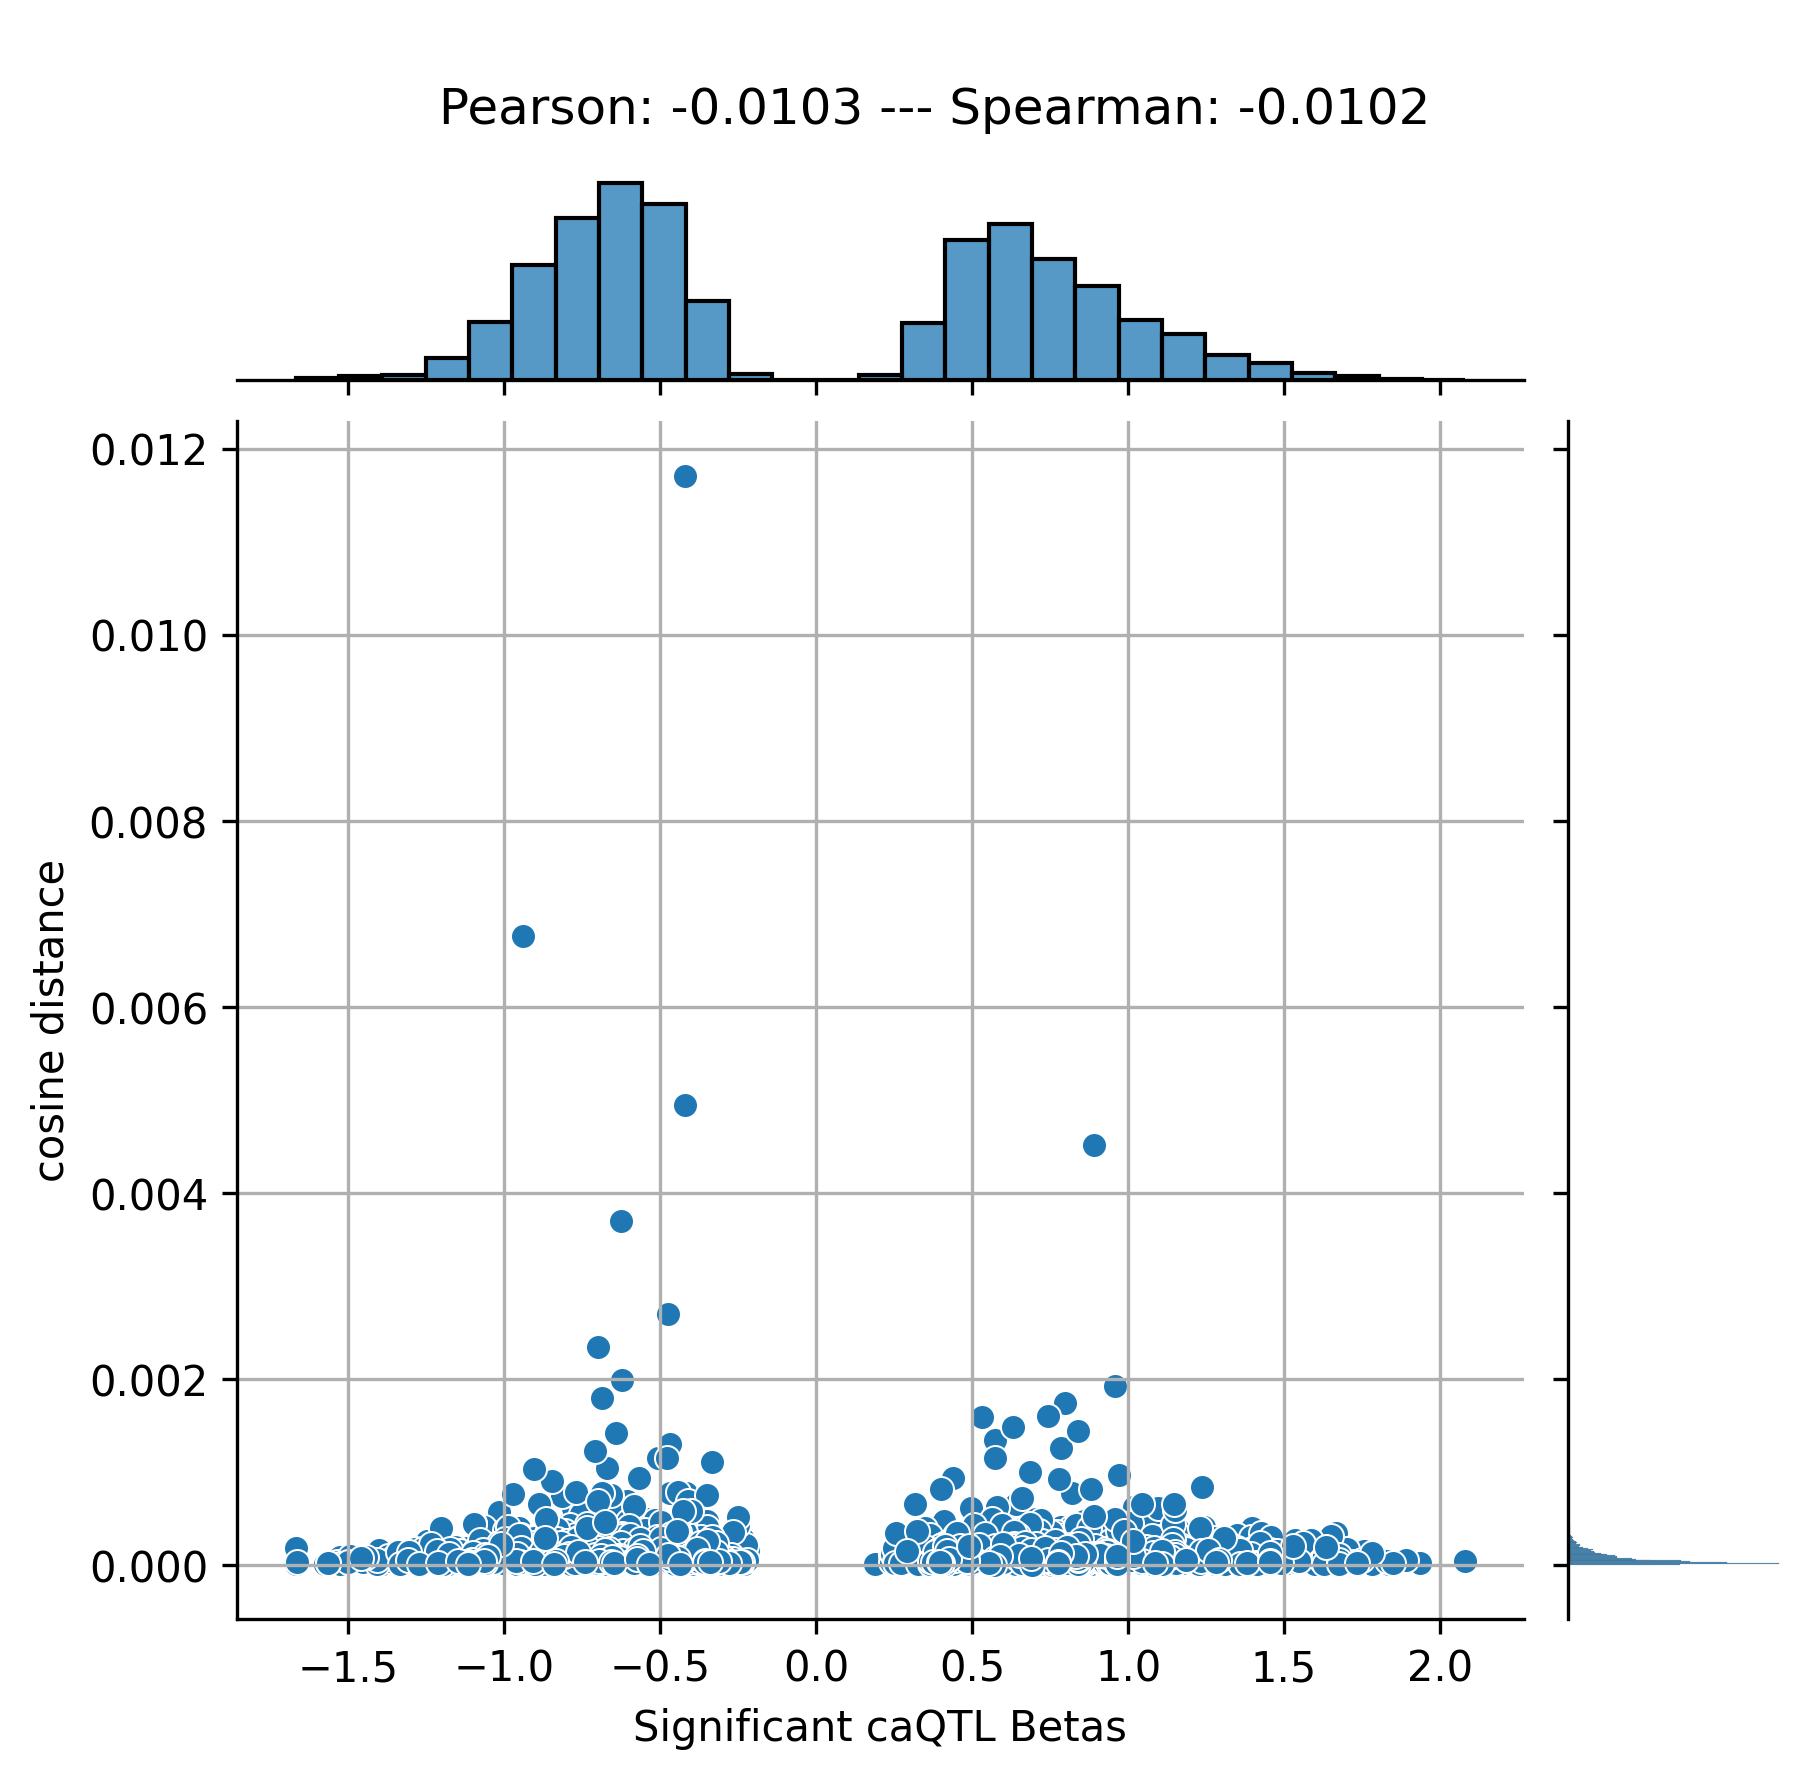

0.08509542549173738 0.5081384008511276 -0.010331444803036218 -0.010170860190818825
unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 1.15931544573405e-05
HyenaDNA African Significant caQTLs


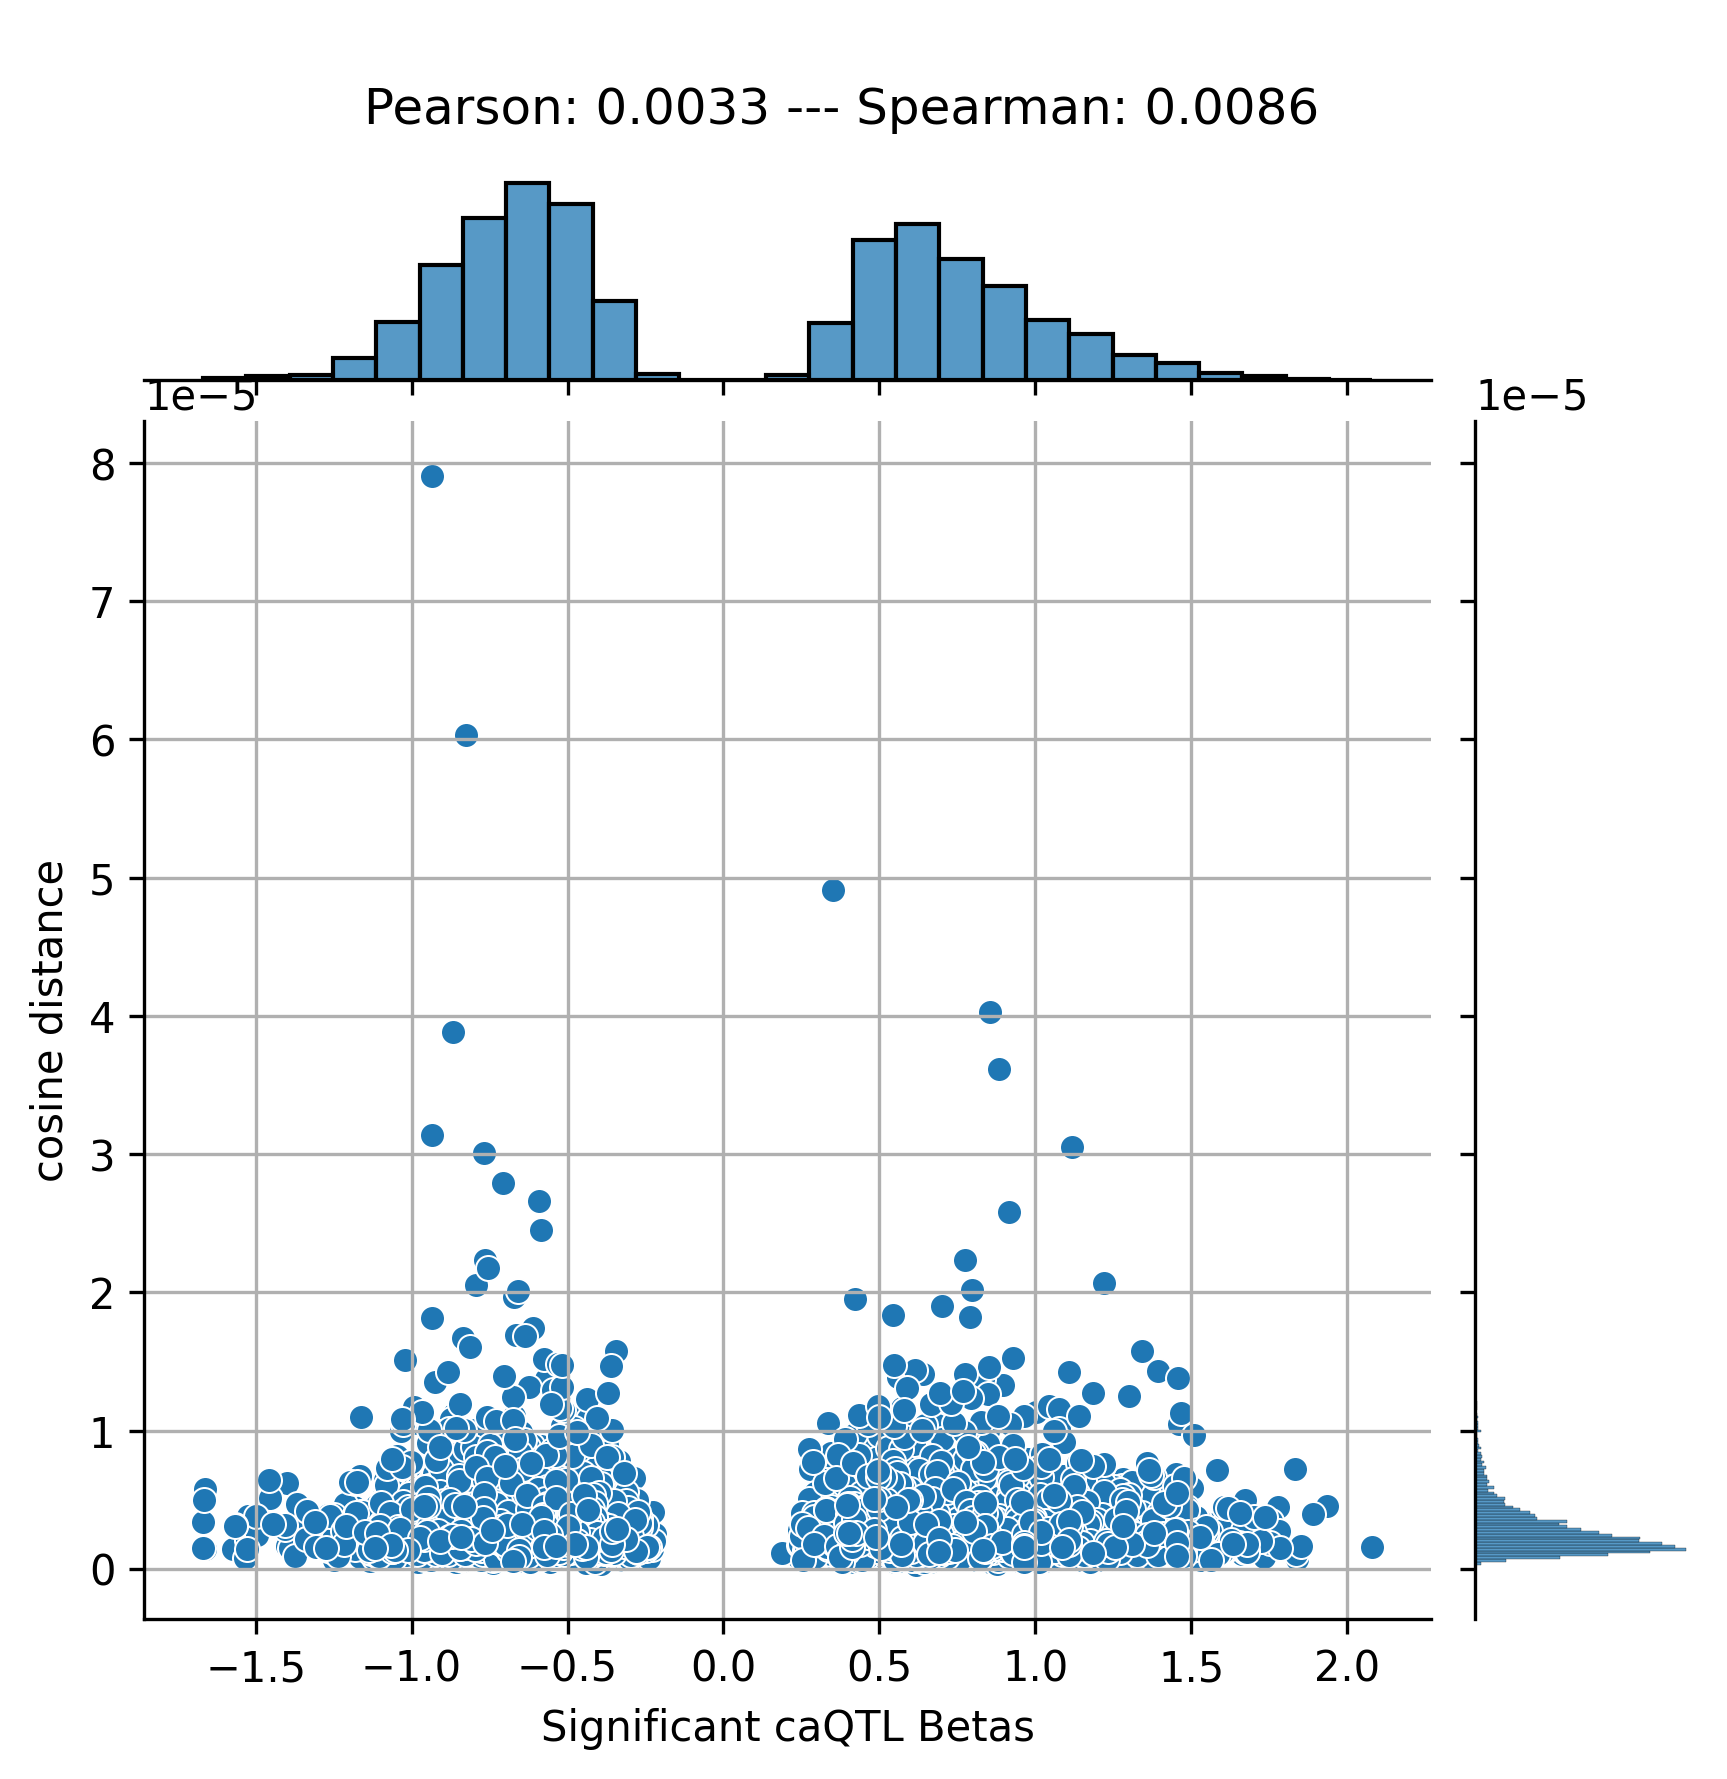

0.08507675427111616 0.5154246119850056 0.0032690136673161965 0.00858298834524173
unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 1.8433071587166782e-07
Nucleotide Transformer African Significant caQTLs


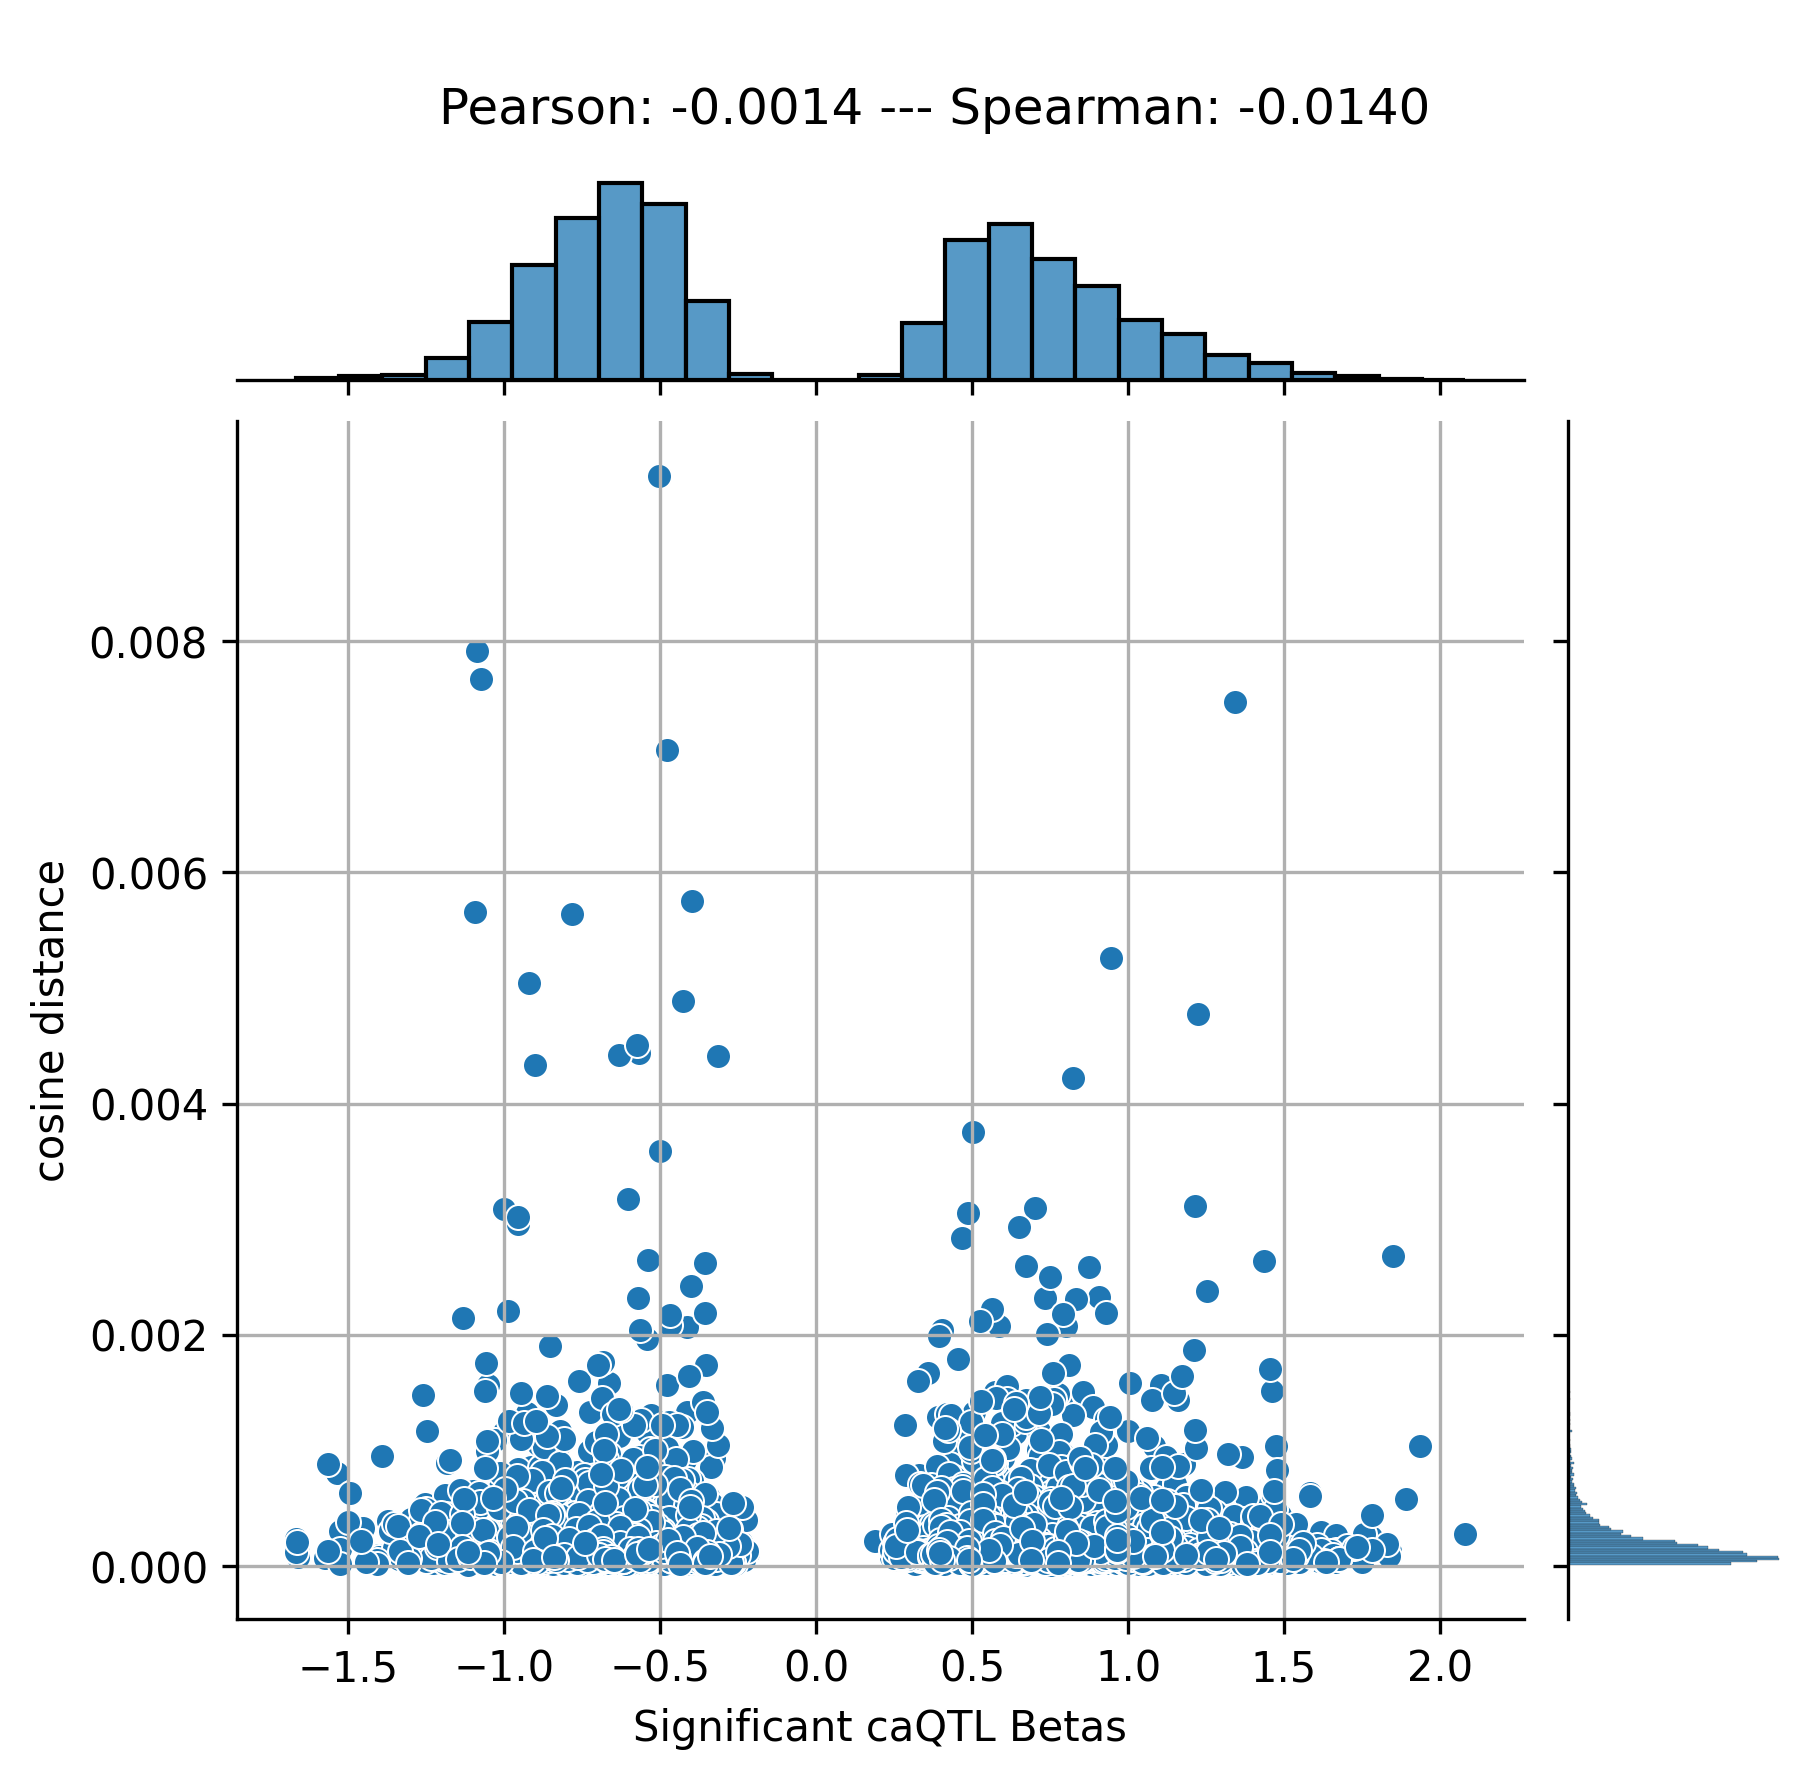

0.08632229304323812 0.5185326666729057 -0.0014152116144749434 -0.013993883073333371
unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
DNABert2 Yoruba Significant dsQTLs


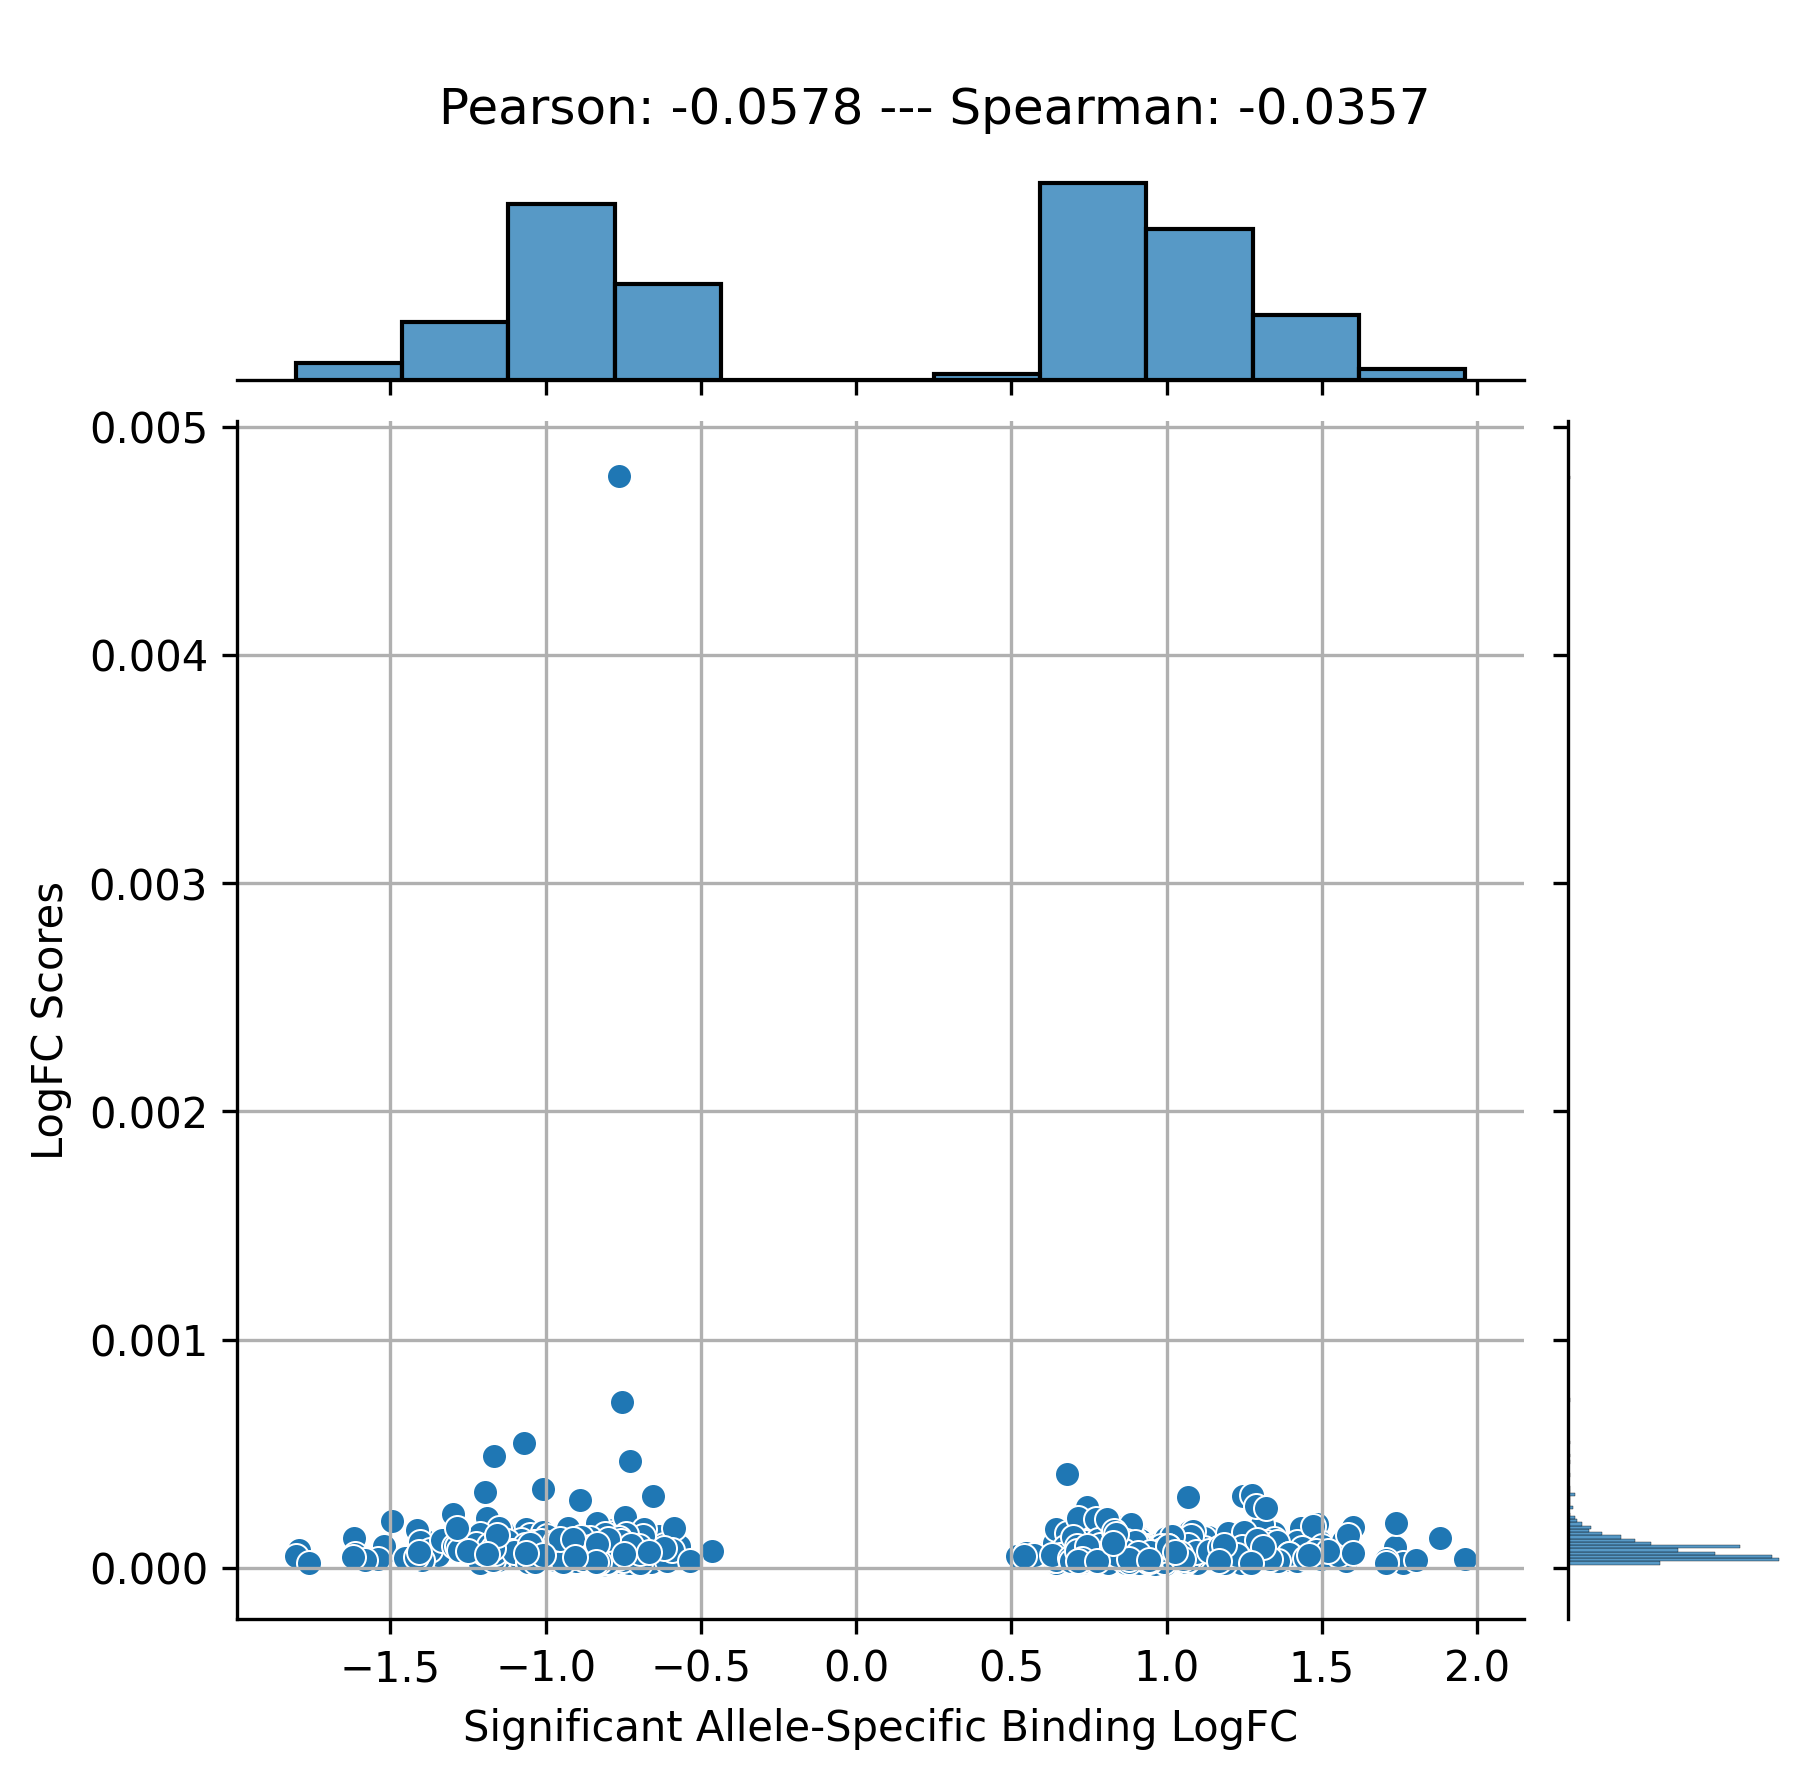

unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
Gena LM Yoruba Significant dsQTLs


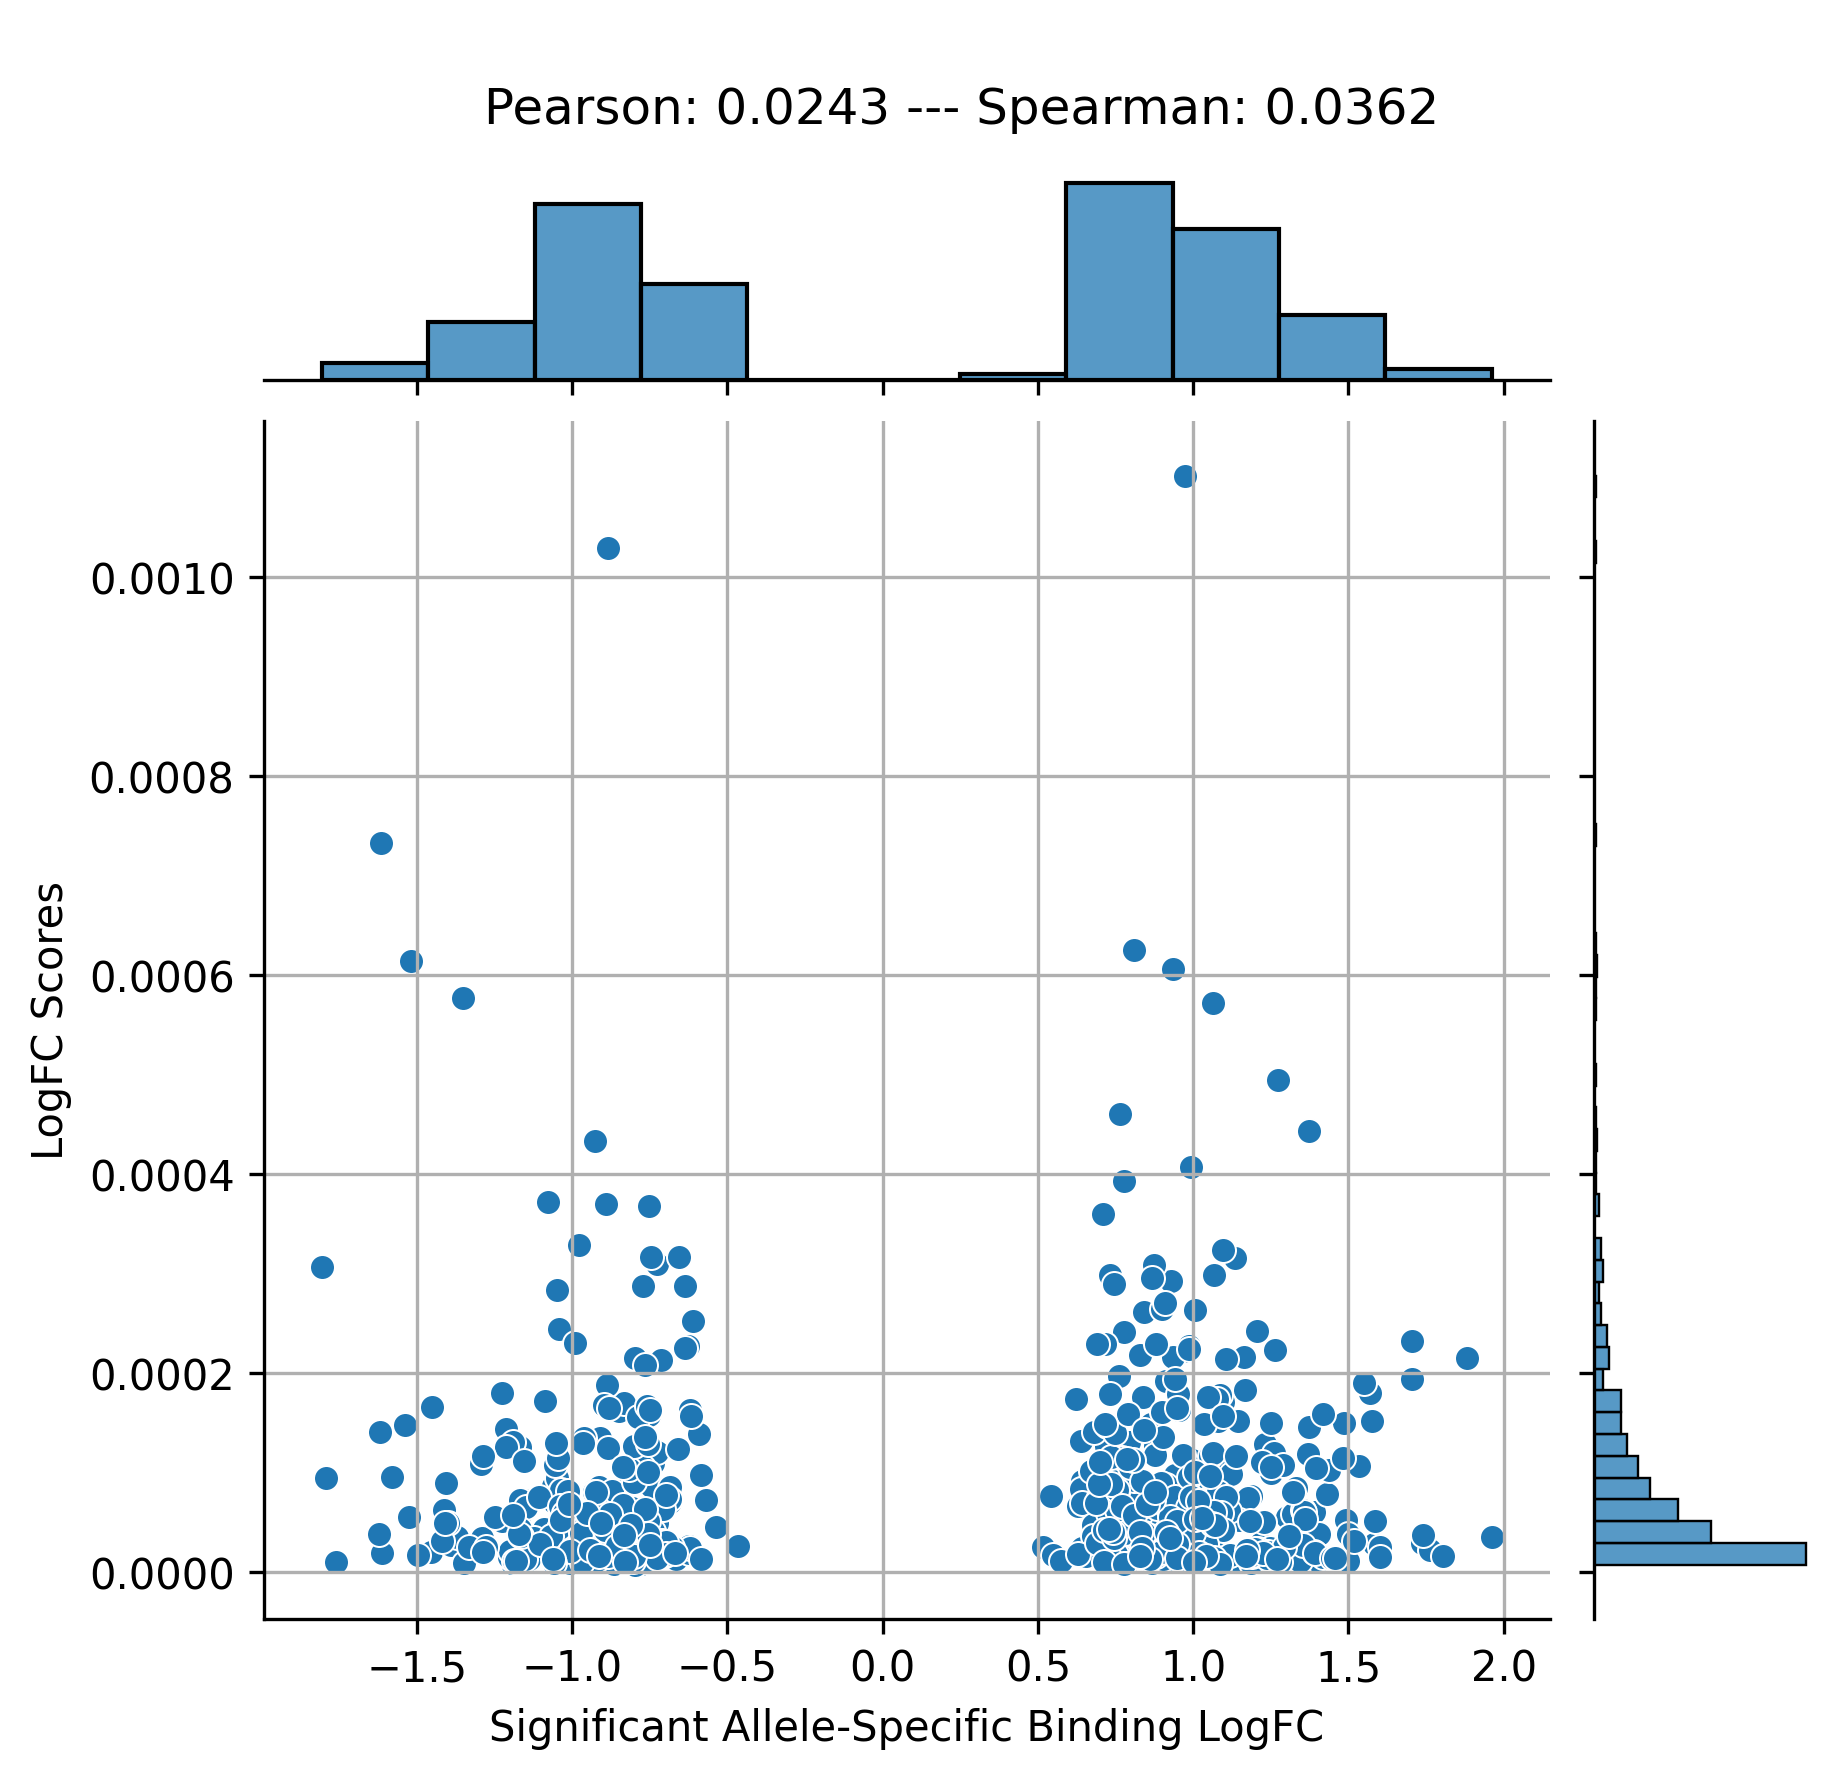

unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
HyenaDNA Yoruba Significant dsQTLs


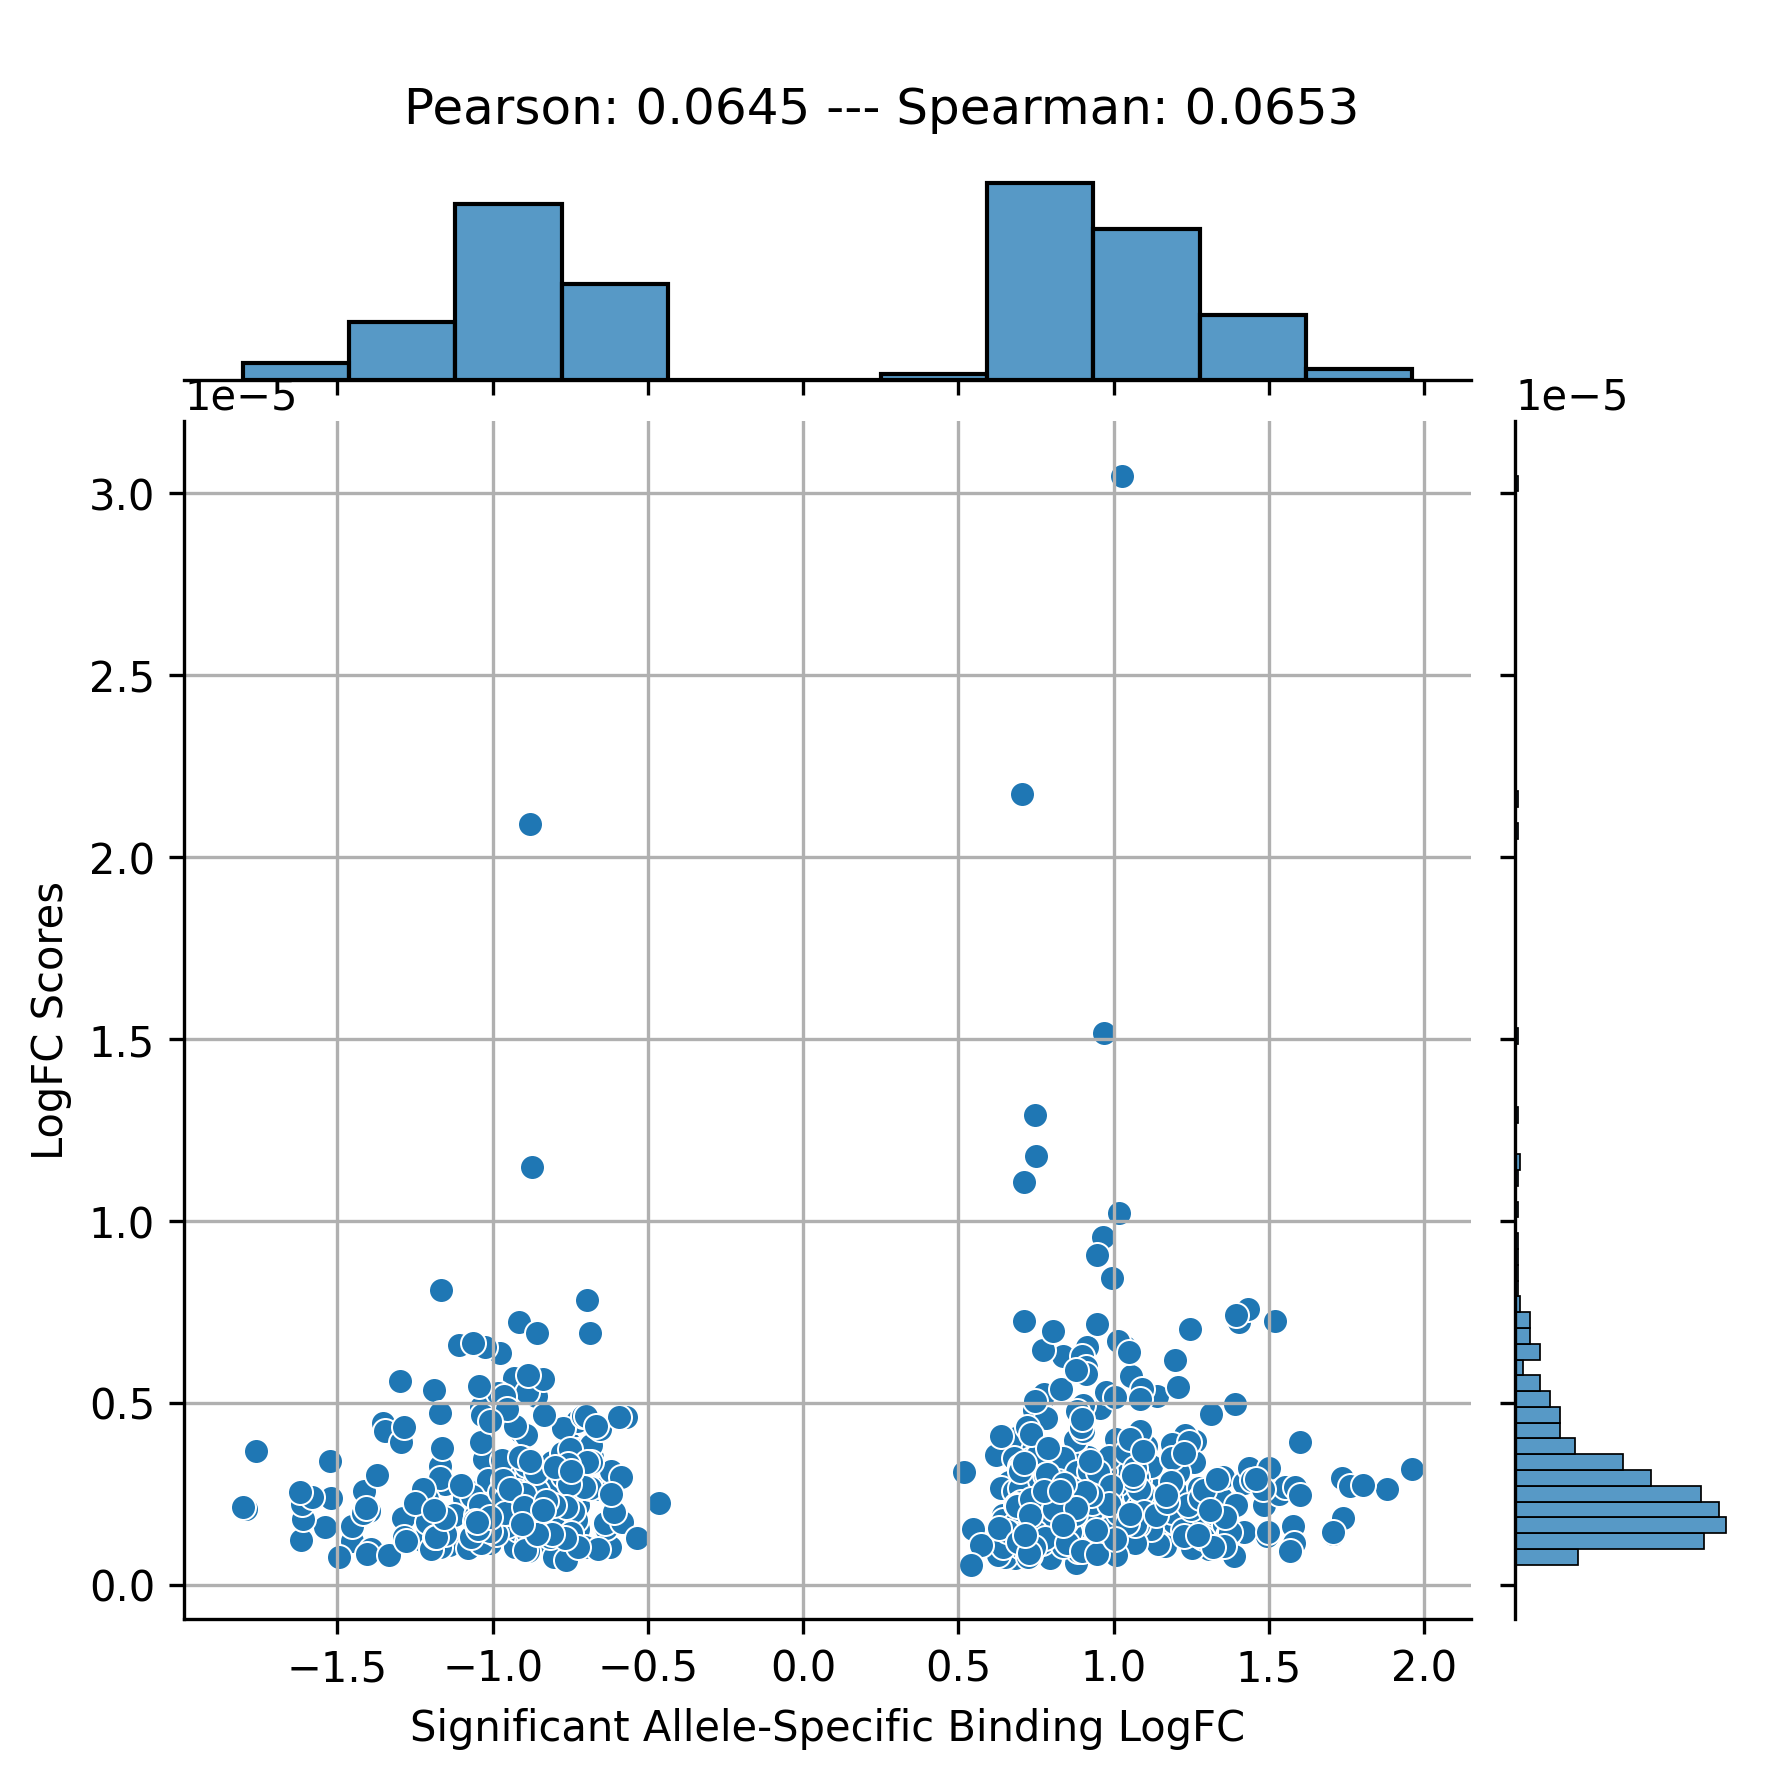

unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
Nucleotide Transformer Yoruba Significant dsQTLs


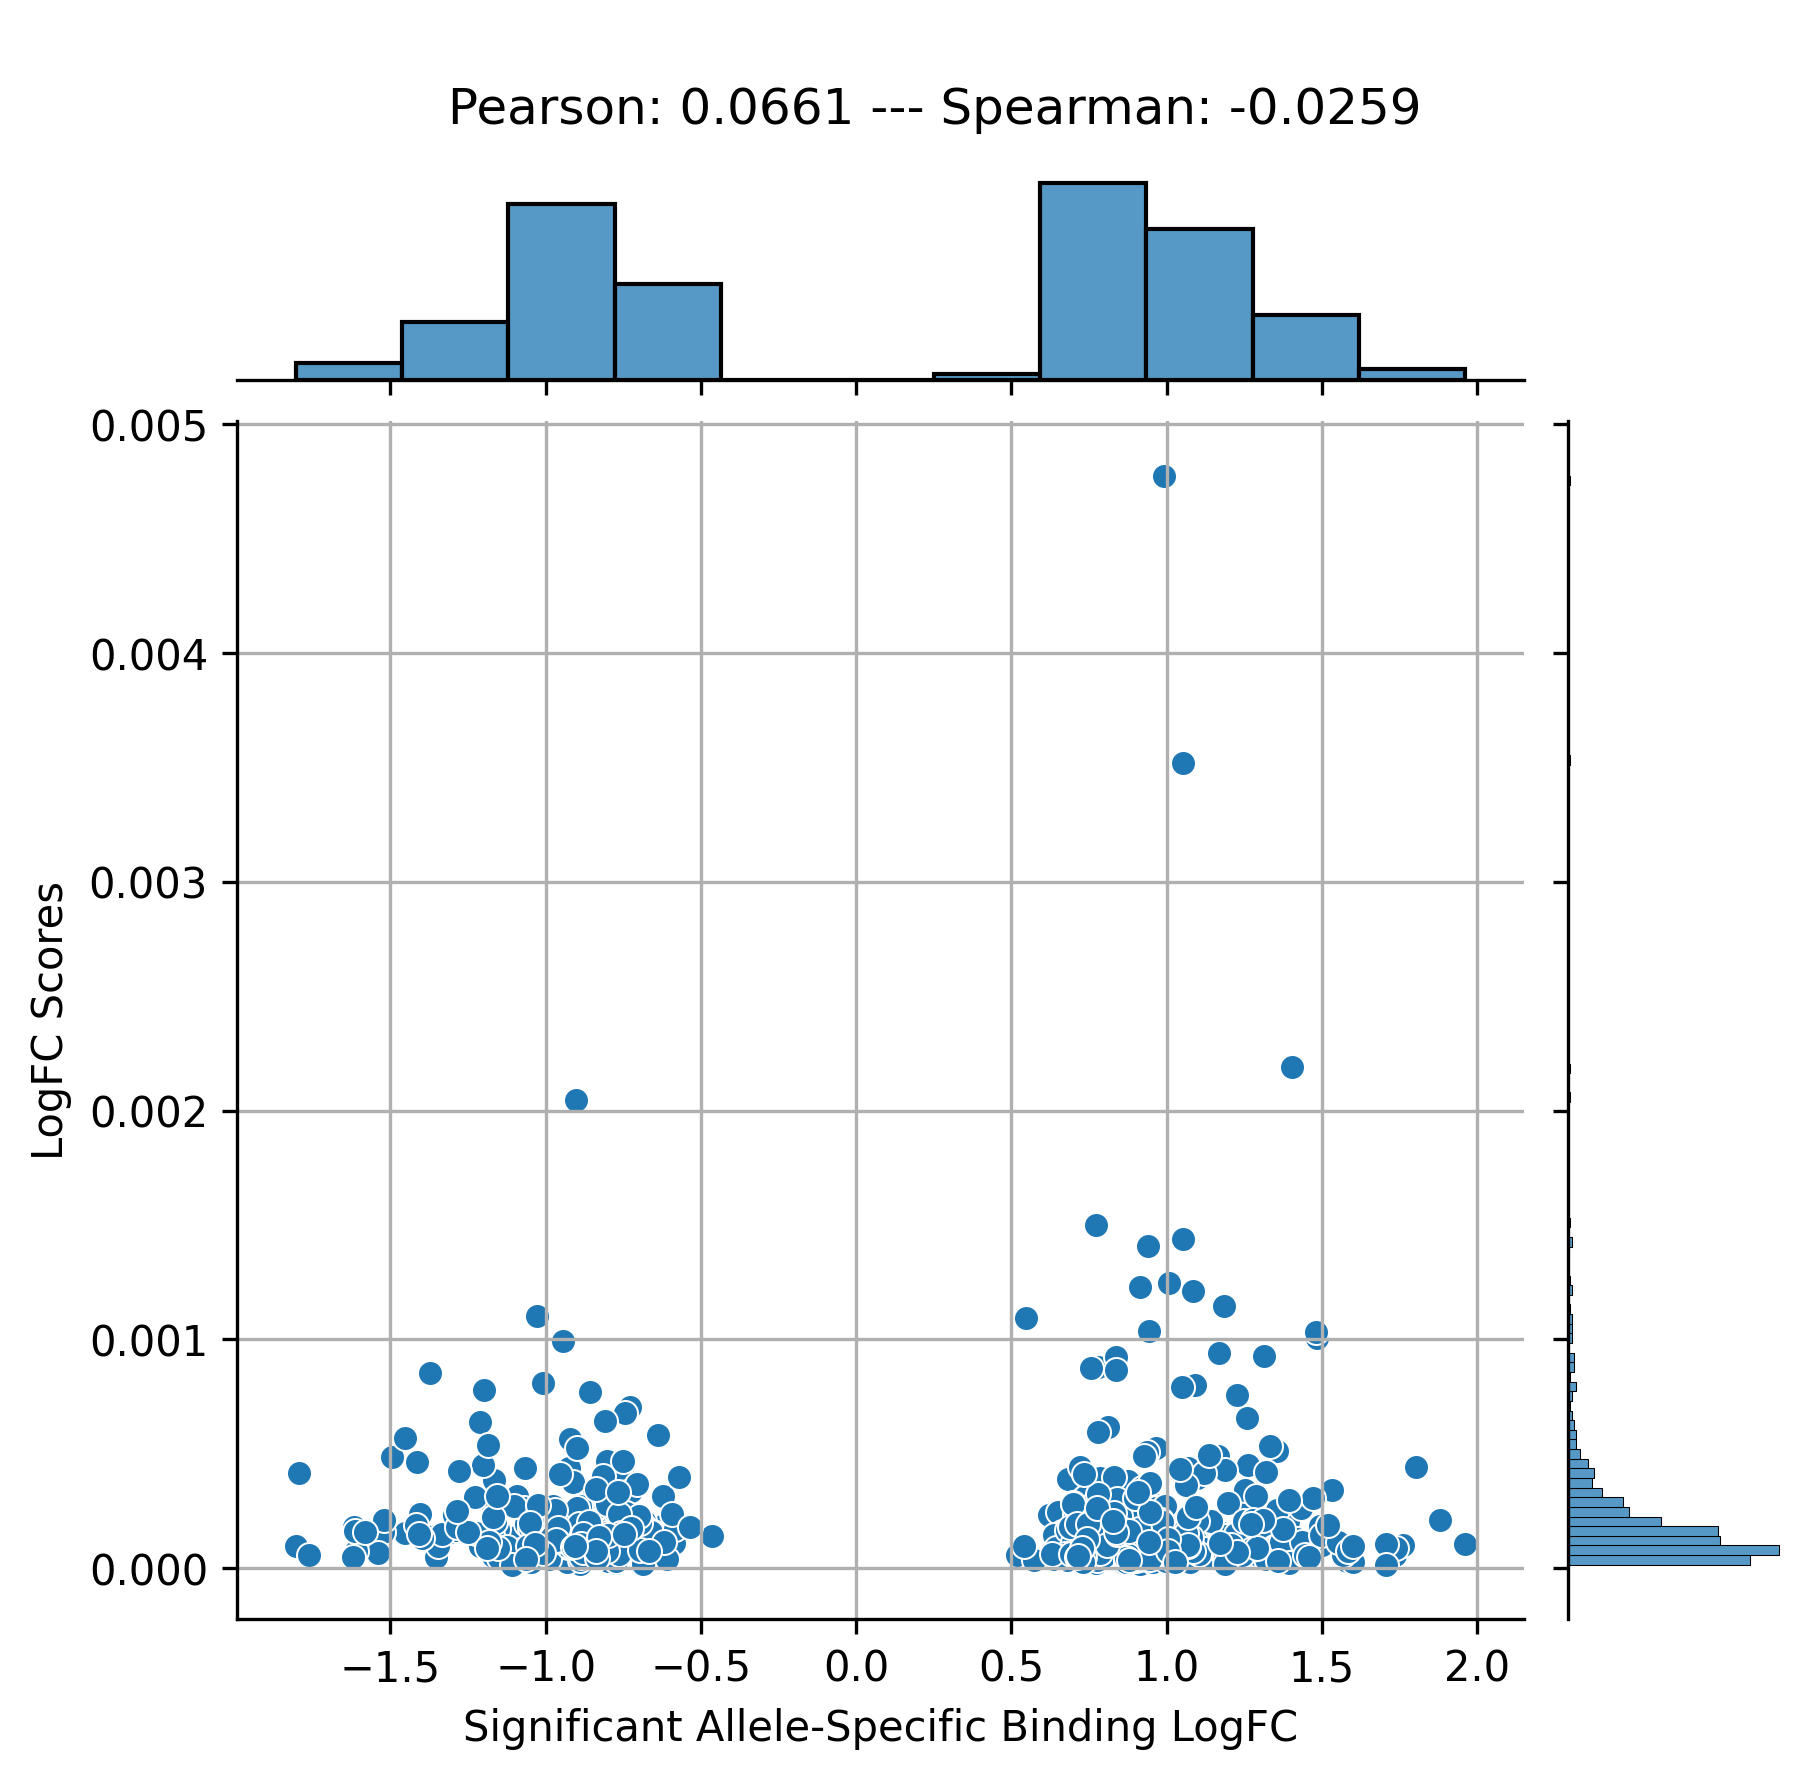

In [5]:
model_names=["DNABERT-2-117M", "gena-lm-bert-large-t2t", "hyenadna-large-1m-seqlen-hf",
             "nucleotide-transformer-v2-500m-multi-species"]
models=["DNABert2", "Gena LM", "HyenaDNA", "Nucleotide Transformer"]
model_path = "/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/zero_shot/embeddings"

afr_counts_pvals = []
afr_counts_auprc = []
afr_counts_auroc = []
afr_counts_pearson = []
afr_counts_spearman = []

yoruba_counts_pvals = []
yoruba_counts_auprc = []
yoruba_counts_auroc = []
yoruba_counts_pearson = []
yoruba_counts_spearman = []

for model_name, model in zip(model_names, models):
    
    filtered_var_afr_caQTLs_df_ctrl, filtered_var_afr_caQTLs_df_sig = sig_ctrl_variants_Afr_CaQTLs(f"{model_path}/{model_name}/Afr.CaQTLS.tsv")
    ctrl_afr_countss = filtered_var_afr_caQTLs_df_ctrl["cosine_distance"]
    sig_afr_countss = filtered_var_afr_caQTLs_df_sig["cosine_distance"]
    afr_stat, afr_pval = mannwhitneyu(ctrl_afr_countss, sig_afr_countss, alternative="less")
    afr_counts_pvals += [afr_pval]
    print("African caQTL Mann Whitney pVal:", afr_pval)
    print(f"{model} African Significant caQTLs")
    pearson, spearman = beta_logfc(filtered_var_afr_caQTLs_df_sig, "", "cosine distance", "cosine_distance")
    auprc, auroc = get_precision_recall_auc(ctrl_afr_countss, sig_afr_countss)
    afr_counts_auprc += [auprc]
    afr_counts_auroc += [auroc]
    afr_counts_pearson += [pearson]
    afr_counts_spearman += [spearman]
    print(auprc, auroc, pearson, spearman)
    
for model_name, model in zip(model_names, models):    
    filtered_var_yoruba_caQTLs_df_ctrl, filtered_var_yoruba_caQTLs_df_sig = variants_Yoruba_LCL_dsQTLs(f"{model_path}/{model_name}/gm12878.dsqtls.benchmarking.tsv")
    ctrl_yoruba_countss = filtered_var_yoruba_caQTLs_df_ctrl["cosine_distance"]
    sig_yoruba_countss = filtered_var_yoruba_caQTLs_df_sig["cosine_distance"]
    yoruba_stat, yoruba_pval = mannwhitneyu(ctrl_yoruba_countss, sig_yoruba_countss, alternative="less")
    yoruba_counts_pvals += [yoruba_pval]
    print(f"{model} Yoruba Significant dsQTLs")
    pearson, spearman = est_size_logfc(filtered_var_yoruba_caQTLs_df_sig, "", "Cosine Distance", "cosine_distance")
    auprc, auroc = get_precision_recall_auc(ctrl_yoruba_countss, sig_yoruba_countss)
    yoruba_counts_auprc += [auprc]
    yoruba_counts_auroc += [auroc]
    yoruba_counts_pearson += [pearson]
    yoruba_counts_spearman += [spearman]

In [6]:
model_names=["nucleotide-transformer-v2-500m-multi-species", "hyenadna-large-1m-seqlen-hf",
            "DNABERT-2-117M", "gena-lm-bert-large-t2t"]
models=["Nucleotide Transformer", "HyenaDNA", "DNABert2", "Gena LM"]
model_path = "/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/zero_shot/embeddings"

afr_embeddings_pvals = []
afr_embeddings_auprc = []
afr_embeddings_auroc = []

yoruba_embeddings_pvals = []
yoruba_embeddings_auprc = []
yoruba_embeddings_auroc = []

for model_name, model in zip(model_names, models):
    
    filtered_var_afr_caQTLs_df_ctrl, filtered_var_afr_caQTLs_df_sig = sig_ctrl_variants_Afr_CaQTLs(f"{model_path}/{model_name}/Afr.CaQTLS.tsv")
    ctrl_afr_embeddings = filtered_var_afr_caQTLs_df_ctrl["cosine_distance"]
    sig_afr_embeddings = filtered_var_afr_caQTLs_df_sig["cosine_distance"]
    afr_stat, afr_pval = mannwhitneyu(ctrl_afr_embeddings, sig_afr_embeddings, alternative="less")
    afr_embeddings_pvals += [afr_pval]
    print("African caQTL Mann Whitney pVal:", afr_pval)
    auprc, auroc = get_precision_recall_auc(ctrl_afr_embeddings, sig_afr_embeddings)#, f"African caQTLs scored by {model}")
    afr_embeddings_auprc += [auprc]
    afr_embeddings_auroc += [auroc]
    
    filtered_var_yoruba_caQTLs_df_ctrl, filtered_var_yoruba_caQTLs_df_sig = variants_Yoruba_LCL_dsQTLs(f"{model_path}/{model_name}/gm12878.dsqtls.benchmarking.tsv")
    ctrl_yoruba_embeddings = filtered_var_yoruba_caQTLs_df_ctrl["cosine_distance"]
    sig_yoruba_embeddings = filtered_var_yoruba_caQTLs_df_sig["cosine_distance"]    
    yoruba_stat, yoruba_pval = mannwhitneyu(ctrl_yoruba_embeddings, sig_yoruba_embeddings, alternative="less")
    yoruba_embeddings_pvals += [yoruba_pval]
    auprc, auroc = get_precision_recall_auc(ctrl_yoruba_embeddings, sig_yoruba_embeddings)#, f"Yoruba dsQTLs scored by {model}")
    yoruba_embeddings_auprc += [auprc]
    yoruba_embeddings_auroc += [auroc]

unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 1.8433071587166782e-07
unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 1.15931544573405e-05
unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 0.999999983341147
unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 0.01278163217190406
unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64


In [7]:
from tabulate import tabulate

mydata = [
    afr_embeddings_pvals,
    afr_embeddings_auprc,
    afr_embeddings_auroc,
    yoruba_embeddings_pvals,
    yoruba_embeddings_auprc,
    yoruba_embeddings_auroc
]
index = ["African P value", "African AUPRC", "African AUROC",
          "Yoruba P value", "Yoruba AUPRC", "Yoruba AUROC"]

mydata = [[i] + row for i, row in zip(index, mydata)]
print(tabulate(mydata, headers=models, tablefmt="grid"))

+-----------------+--------------------------+-------------+------------+-----------+
|                 |   Nucleotide Transformer |    HyenaDNA |   DNABert2 |   Gena LM |
+=================+==========================+=============+============+===========+
| African P value |              1.84331e-07 | 1.15932e-05 |  1         | 0.0127816 |
+-----------------+--------------------------+-------------+------------+-----------+
| African AUPRC   |              0.0863223   | 0.0850768   |  0.0768987 | 0.0850954 |
+-----------------+--------------------------+-------------+------------+-----------+
| African AUROC   |              0.518533    | 0.515425    |  0.479869  | 0.508138  |
+-----------------+--------------------------+-------------+------------+-----------+
| Yoruba P value  |              3.16173e-20 | 0.107993    |  0.351429  | 0.467383  |
+-----------------+--------------------------+-------------+------------+-----------+
| Yoruba AUPRC    |              0.0303582   | 0.02077

unique label values label
False    77999
True      6821
Name: count, dtype: int64
unique label values label
False    77999
True      6821
Name: count, dtype: int64
unique label values label
False    77999
True      6821
Name: count, dtype: int64
unique label values label
False    77999
True      6821
Name: count, dtype: int64


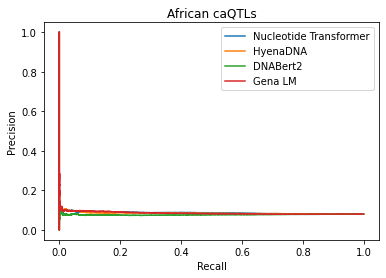

unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64


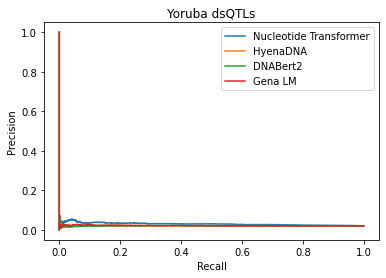

In [8]:
models=["Nucleotide Transformer", "HyenaDNA", "DNABert2", "Gena LM"]
model_path = "/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/zero_shot/embeddings"

for model_name, model in zip(model_names, models):
    filtered_var_afr_caQTLs_df_ctrl, filtered_var_afr_caQTLs_df_sig = sig_ctrl_variants_Afr_CaQTLs(f"{model_path}/{model_name}/Afr.CaQTLS.tsv")
    ctrl_afr_counts = list(filtered_var_afr_caQTLs_df_ctrl["cosine_distance"])
    sig_afr_counts = list(filtered_var_afr_caQTLs_df_sig["cosine_distance"])    
    llm_scores = list(ctrl_afr_counts) + list(sig_afr_counts)
    labels = len(ctrl_afr_counts)*[0]+len(sig_afr_counts)*[1]
    precision, recall, thresholds = precision_recall_curve(labels, llm_scores)
    auprc = auc(recall, precision)
    plt.plot(recall, precision, label=model)
    plt.ylabel("Precision")
    plt.xlabel("Recall")
    plt.title("African caQTLs")
plt.legend()
plt.show()

for model_name, model in zip(model_names, models):
    filtered_var_yoruba_caQTLs_df_ctrl, filtered_var_yoruba_caQTLs_df_sig = variants_Yoruba_LCL_dsQTLs(f"{model_path}/{model_name}/gm12878.dsqtls.benchmarking.tsv")
    ctrl_afr_counts = list(filtered_var_yoruba_caQTLs_df_ctrl["cosine_distance"])
    sig_afr_counts = list(filtered_var_yoruba_caQTLs_df_sig["cosine_distance"])       
    llm_scores = list(ctrl_afr_counts) + list(sig_afr_counts)
    labels = len(ctrl_afr_counts)*[0]+len(sig_afr_counts)*[1]
    precision, recall, thresholds = precision_recall_curve(labels, llm_scores)
    auprc = auc(recall, precision)
    plt.plot(recall, precision, label=model)
    plt.ylabel("Precision")
    plt.xlabel("Recall")
    plt.title("Yoruba dsQTLs")
plt.legend()
plt.show()